### Training the SNEE model

Setting up the environment

In [1]:
!pip install matplotlib==3.5
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.5.0-cp311-cp311-linux_x86_64.whl size=11114792 sha256=27f561dfb7319d84c81357a07efa4529d8f46217d62689952ec52d65c00e8e53
  Stored in directory: /root/.cache/pip/wheels/db/af/5a/22e418cb68b6b39226fa769754c0f8880d706f42383ac22dc7
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.5.0 which is incompatible.
bigframes 1.33.0 requires matplotlib>=3.7.1, but you have matplotlib 3.5.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.8 MB/s eta 0:00:00


In [1]:
# Clone the repository
!git clone https://github.com/Ggenoni/SENN.git

Cloning into 'SENN'...
remote: Enumerating objects: 1926, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 1926 (delta 102), reused 84 (delta 61), pack-reused 1785 (from 3)
Receiving objects: 100% (1926/1926), 27.34 MiB | 28.57 MiB/s, done.
Resolving deltas: 100% (1111/1111), done.


In [ ]:
# Install Miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -b -p /usr/local/miniconda
import os
os.environ["PATH"] += ":/usr/local/miniconda/bin"

--2025-01-23 15:05:43--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147784736 (141M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 140.94M   257MB/s    in 0.5s    

2025-01-23 15:05:44 (257 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [147784736/147784736]

PREFIX=/usr/local/miniconda
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that you

In [ ]:
!conda --version

conda 24.11.1


In [ ]:
# Change directory
%cd SENN

/content/SENN


In [ ]:
# Create the virtual environment
!conda env create -f environment.yml

Output streaming troncato alle ultime 5000 righe.

scipy-1.7.3          | 21.6 MB   | :  51% 0.5071754215552446/1 [03:59<03:32, 432.19s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.5086203657761998/1 [03:59<03:50, 469.13s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.5100653099971549/1 [04:00<04:04, 498.43s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.51151025421811/1 [04:01<04:10, 513.09s/it]  






scipy-1.7.3          | 21.6 MB   | :  51% 0.5129551984390651/1 [04:02<04:27, 548.60s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.5144001426600202/1 [04:03<04:54, 606.51s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5158450868809754/1 [04:04<05:39, 700.29s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5172900311019305/1 [04:05<05:17, 657.33s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5187349753228856/1 [04:06<05:35, 696.26s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5201799195438407/1 [04:07<05:25, 679.29s/it]







In [ ]:
!source /usr/local/miniconda/bin/activate senn && which python

/usr/local/miniconda/envs/senn/bin/python


In [ ]:
# ==> After running this cell in Colab, restart the runtime changing kernell <==

!source /usr/local/miniconda/bin/activate senn
!pip install ipykernel
!python -m ipykernel install --user --name=senn --display-name "Python (senn)"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00
Installed kernelspec senn in /root/.local/share/jupyter/kernels/senn


In [ ]:
# Check for plt.style.use strings in the code
import os

def search_in_files(directory, search_string):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".py"):  # Search only in Python files
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    for i, line in enumerate(f):
                        if search_string in line:
                            print(f"Found in {file_path}, line {i + 1}: {line.strip()}")

# Replace '.' with the directory you want to search (e.g., '/content/SENN')
search_in_files('/content/SENN', 'plt.style.use')


Found in /content/SENN/senn/trainer.py, line 25: #plt.style.use('seaborn-talk')
Found in /content/SENN/senn/utils/plot_utils.py, line 17: #plt.style.use('seaborn-paper')
Found in /content/SENN/senn/utils/plot_utils.py, line 231: #plt.style.use('seaborn-paper')
Found in /content/SENN/senn/models/senn.py, line 254: #plt.style.use('seaborn-paper')


In [ ]:
# Add the style file
!mkdir -p ~/.config/matplotlib/stylelib/
!echo -e "axes.titlesize: 18\naxes.labelsize: 14\nfigure.dpi: 100" > ~/.config/matplotlib/stylelib/seaborn-paper.mplstyle


In [ ]:
# Connect to GitHub
!git config --global user.email "gaudenzia.genoni@gmail.com"
!git config --global user.name "Ggenoni"


Training the model

In [2]:
%cd SENN

/content/SENN


In [ ]:
# Train the model with our config file

!source /usr/local/miniconda/bin/activate senn && python main.py --config configs/config.json

 EXPERIMENT: mnist_lambda1e-4_seed29
{'aggregator': 'SumAggregator',
 'batch_size': 200,
 'cl_sizes': [1, 10, 20],
 'concept_dim': 1,
 'concept_reg': 1,
 'conceptizer': 'ConvConceptizer',
 'data_path': 'datasets/data/mnist_data',
 'dataloader': 'mnist',
 'device': 'cpu',
 'dropout': 0.5,
 'epochs': 5,
 'eval_freq': 270,
 'exp_name': 'mnist_lambda1e-4_seed29',
 'hidden_sizes': [320, 50],
 'image_size': 28,
 'lr': 0.0002,
 'manual_seed': 29,
 'num_classes': 10,
 'num_concepts': 5,
 'parameterizer': 'ConvParameterizer',
 'print_freq': 100,
 'robust_reg': 0.0001,
 'robustness_loss': 'mnist_robustness_loss',
 'sparsity_reg': 2e-05,
 'train': True}
Using device cpu
Loading data ...
Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>

100.0%
Extracting datasets/data/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to datasets/data/mnist_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>

100.0%
Extracting datasets/data/

In [ ]:
!git add -f results/

In [ ]:
!git commit -m "Force add results folder"

# Change token with the real token
!git remote set-url origin https://{token}@github.com/Ggenoni/SENN.git
!git push origin master

### SENN

In [3]:
import json
import torch
import numpy as np
import torch.nn as nn
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from pathlib import Path
from types import SimpleNamespace
from importlib import import_module

In [4]:
! pwd

/content/SENN


In [5]:
from senn.models.losses import *
from senn.models.parameterizers import *
from senn.models.conceptizers import *
from senn.models.aggregators import *
from senn.models.senn import SENN, DiSENN

In [8]:
from senn.datasets.dataloaders import get_dataloader
from senn.utils.plot_utils import show_explainations, show_prototypes, plot_lambda_accuracy, get_comparison_plot


In [9]:
def load_checkpoint(config):
    model_file = Path('results') / config.exp_name / "checkpoints" / "best_model.pt"
    return torch.load(model_file, config.device)


In [10]:
def get_config(filename):
    config_path = Path('configs')
    config_file = config_path / filename
    with open(config_file, 'r') as f:
        config = json.load(f)

    return SimpleNamespace(**config)

In [11]:
def accuracy(model, dataloader, config):
    accuracies = []
    model.eval()
    with torch.no_grad():
        for i, (x, labels) in enumerate(dataloader):
            x = x.float().to(config.device)
            labels = labels.long().to(config.device)
            y_pred, (concepts, relevances), _ = model(x)
            accuracies.append((y_pred.argmax(axis=1) == labels).float().mean().item())
    accuracy = np.array(accuracies).mean()
    print(f"Test Mean Accuracy: {accuracy * 100: .3f} %")


In [12]:
mnist_config = get_config("config.json")
#mnist_config.device = "cpu"

In [13]:
_, _, mnist_test_dl = get_dataloader(mnist_config)

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting datasets/data/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to datasets/data/mnist_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 347kB/s]


Extracting datasets/data/mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to datasets/data/mnist_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.16MB/s]


Extracting datasets/data/mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to datasets/data/mnist_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.36MB/s]

Extracting datasets/data/mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to datasets/data/mnist_data/MNIST/raw



In [14]:
conceptizer = ConvConceptizer(**mnist_config.__dict__)
parameterizer = ConvParameterizer(**mnist_config.__dict__)
aggregator = SumAggregator(**mnist_config.__dict__)

mnist_SENN = SENN(conceptizer, parameterizer, aggregator)


In [15]:
mnist_checkpoint = load_checkpoint(mnist_config)
mnist_SENN.load_state_dict(mnist_checkpoint['model_state'])


<ipython-input-9-e50c7129635c>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_file, config.device)


<All keys matched successfully>

In [196]:
accuracy(mnist_SENN, mnist_test_dl, mnist_config)

Test Mean Accuracy:  93.810 %


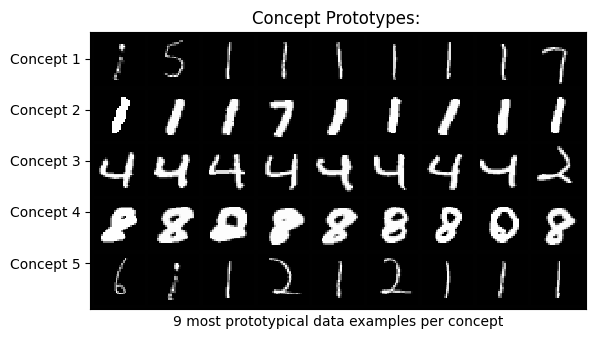

<Figure size 640x480 with 0 Axes>

In [195]:
show_prototypes(mnist_SENN, mnist_test_dl, 'activation')

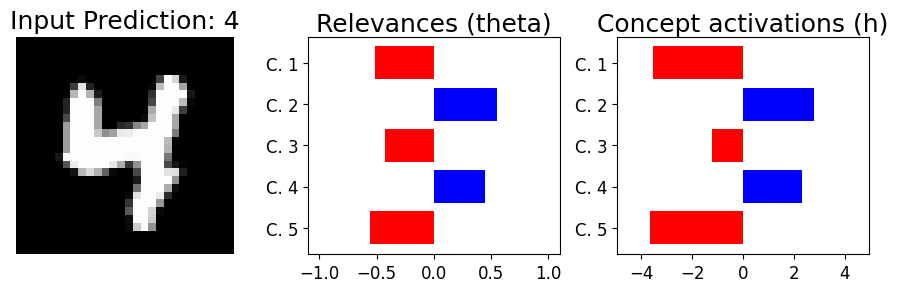

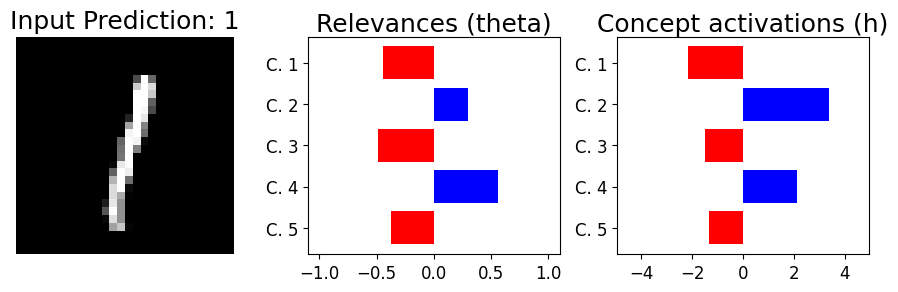

In [17]:
# Rememer to save the images!!!!
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


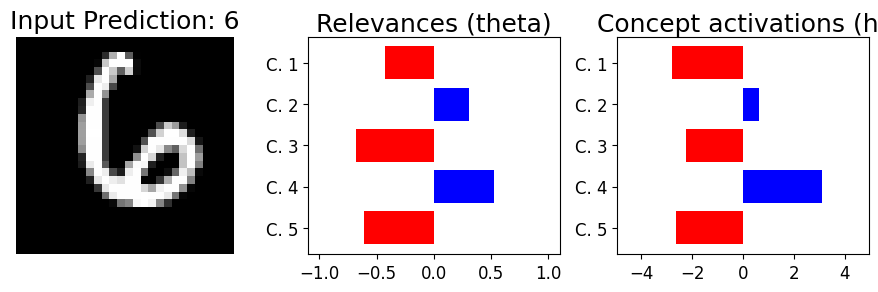

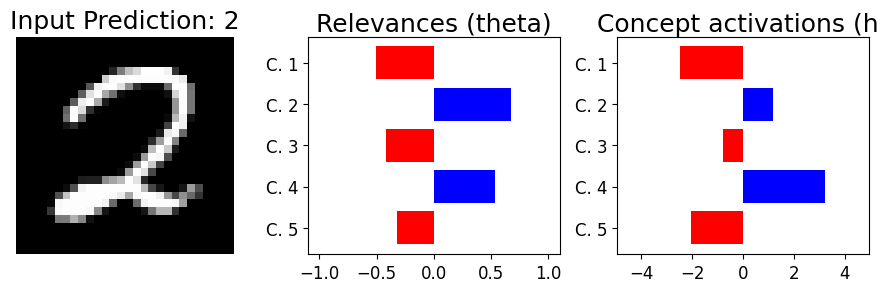

In [ ]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


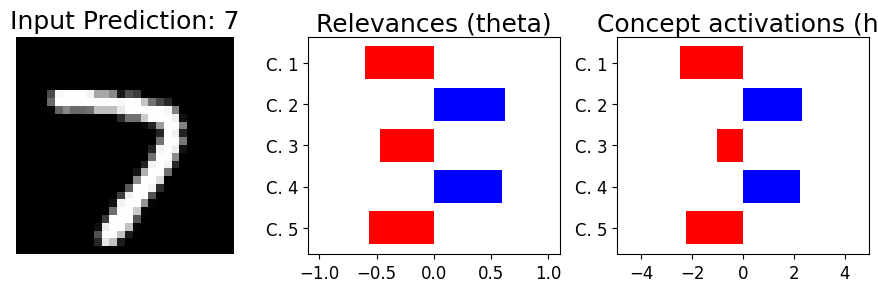

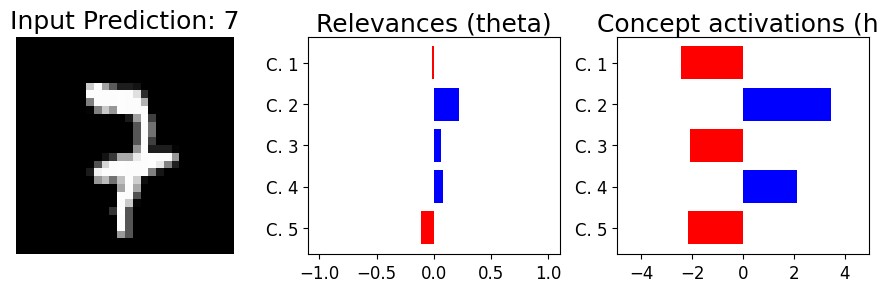

In [ ]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


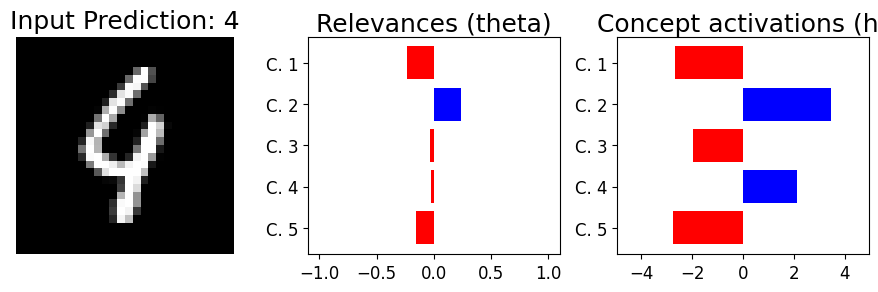

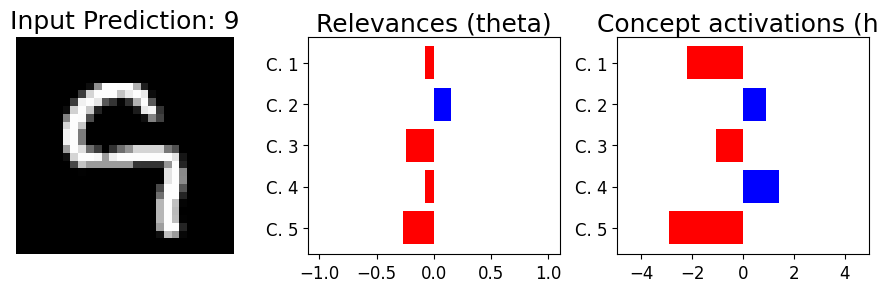

In [ ]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


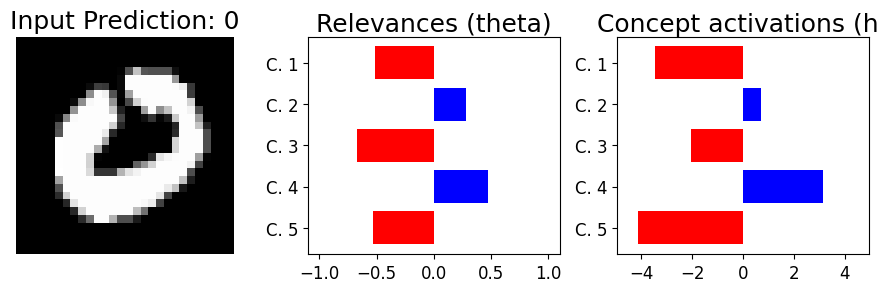

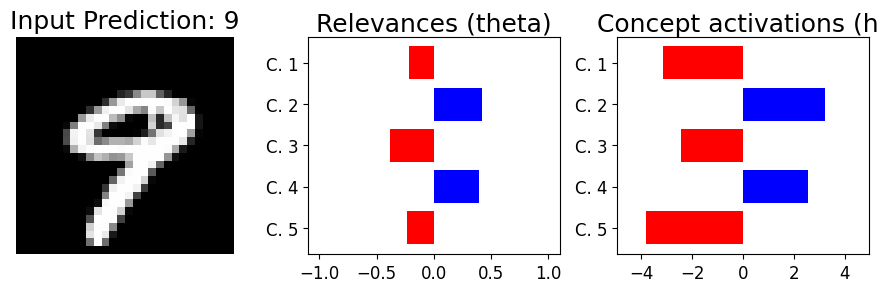

In [ ]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


### Integrated Gradients

In [19]:
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from torchvision.transforms import functional as TF
import random

In [ ]:
from senn.models.senn import SENNWrapper

In [ ]:
#from senn.models.senn import LimeWrapper
# If the cell above does not work, try this one
import importlib
import senn.models.senn
importlib.reload(senn.models.senn)

from senn.models.senn import SENNWrapper
from senn.models.senn import LimeWrapper


In [20]:
# Use our SENN wrapper to make the model compatible with Integrated Gradients implemented in the captum library
wrapped_model = SENNWrapper(mnist_SENN)
ig = IntegratedGradients(wrapped_model)


Visualize the attribution maps and calculate the completeness gap

In [ ]:
# Function to calculate completeness gap
def compute_completeness_gap(model, input_image, baseline, target_class):
    """
    Computes the completeness gap for the Integrated Gradients attributions.

    Args:
        model: The model to evaluate.
        input_image: Input image tensor of shape (1, C, H, W).
        baseline: Baseline image tensor of shape (1, C, H, W).
        target_class: The target class index for which the attributions are computed.

    Returns:
        completeness_gap: The absolute difference between the sum of attributions and the model's prediction difference.
    """
    # Initialize Integrated Gradients
    ig = IntegratedGradients(model)

    # Compute attributions
    attributions = ig.attribute(input_image, baseline, target=target_class)

    # Compute prediction for the input and baseline
    input_prediction = model(input_image)[:, target_class].item()
    baseline_prediction = model(baseline)[:, target_class].item()

    # Sum of attributions
    attribution_sum = attributions.sum().item()

    # Compute completeness gap
    completeness_gap = abs(attribution_sum - (input_prediction - baseline_prediction))

    return completeness_gap, attributions

In [189]:
# Ensure reproducibility
torch.manual_seed(110)
np.random.seed(110)
random.seed(100)

# Number of random samples to analyze
num_samples = 5

# Get the dataset
dataset = mnist_test_dl.dataset
total_samples = len(dataset)

# Randomly pick indices for the samples
random_indices = torch.randint(0, total_samples, (num_samples,)).tolist()



Sample 1: Completeness Gap = 0.0008


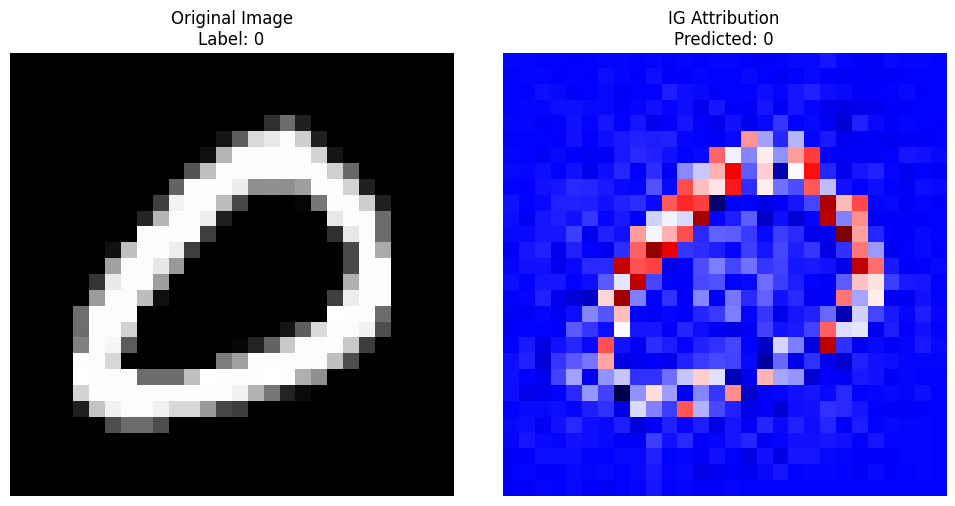



Sample 2: Completeness Gap = 0.0043


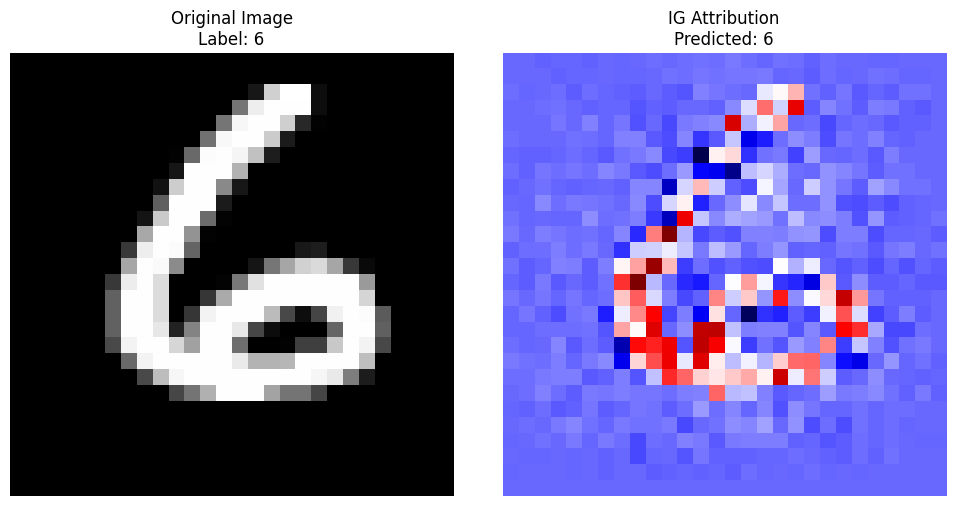



Sample 3: Completeness Gap = 0.0032


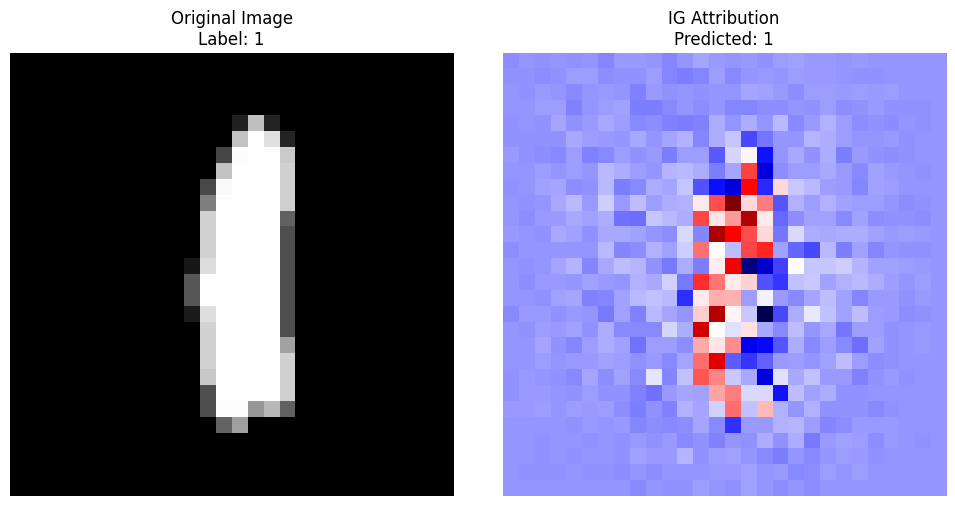



Sample 4: Completeness Gap = 0.0060


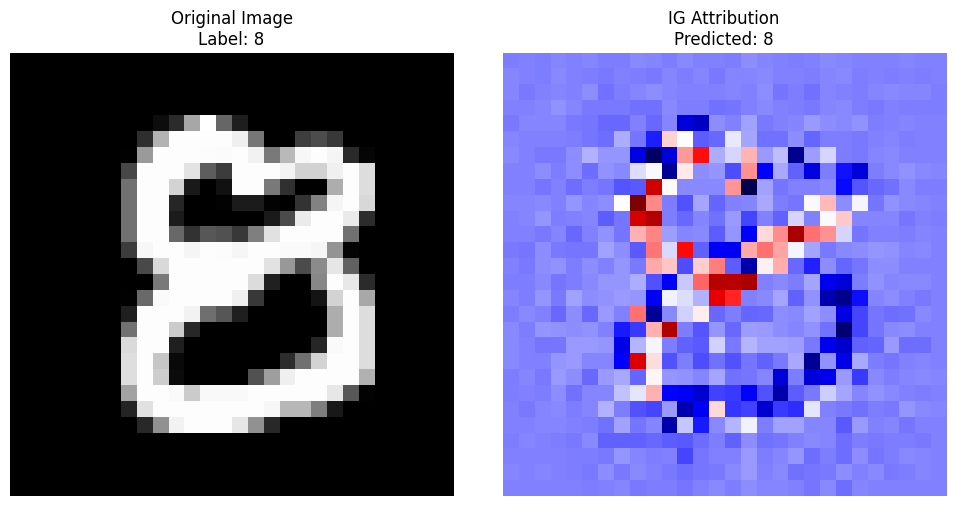



Sample 5: Completeness Gap = 0.0007


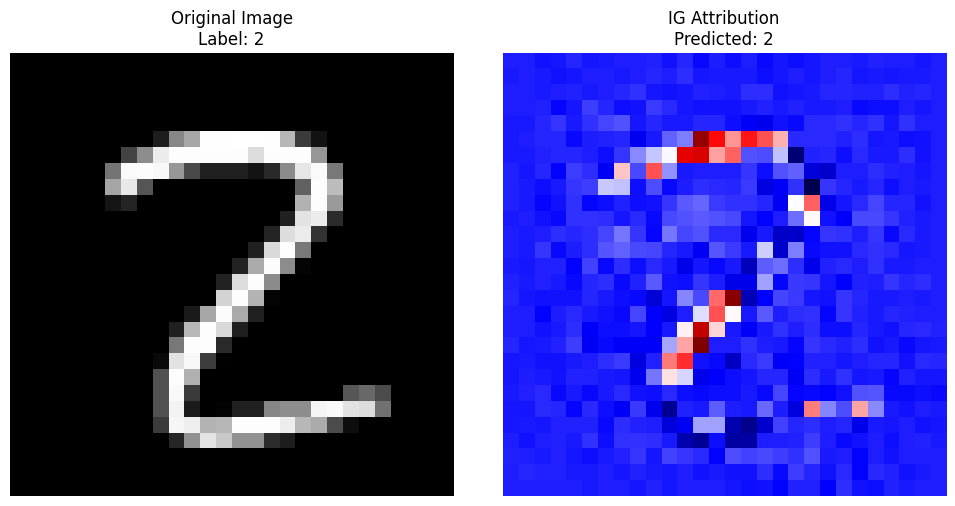

In [190]:
for i, random_index in enumerate(random_indices):
    # Retrieve the sample and label
    sample_input, sample_label = dataset[random_index]

    # Add batch dimension
    sample_input = sample_input.unsqueeze(0)

    # Define the baseline (here, a black image)
    baseline = torch.zeros_like(sample_input)

    # Get the predicted label
    predictions = wrapped_model(sample_input)
    predicted_label = torch.argmax(predictions, dim=1).item()

    # Compute completeness gap
    completeness_gap, attributions = compute_completeness_gap(
        wrapped_model, sample_input, baseline, predicted_label
    )

    print(f"\n\nSample {i + 1}: Completeness Gap = {completeness_gap:.4f}")

    # Optionally visualize the attributions
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_input.squeeze().numpy(), cmap="gray")
    plt.title(f"Original Image\nLabel: {sample_label}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(attributions.squeeze().detach().numpy(), cmap="seismic")
    plt.title(f"IG Attribution\nPredicted: {predicted_label}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

In [188]:
# Function to compute Sensitivity Analysis
def compute_sensitivity_analysis(model, input_image, baseline, target_class, noise_std=0.5, num_perturbations=5):
    """
    Performs sensitivity analysis by adding noise to the input and comparing the resulting attributions.

    Args:
        model: The model to evaluate.
        input_image: Input image tensor of shape (1, C, H, W).
        baseline: Baseline image tensor of shape (1, C, H, W).
        target_class: The target class index for which the attributions are computed.
        noise_std: Standard deviation of Gaussian noise to add (set to a high value for this test).
        num_perturbations: Number of perturbed inputs to generate.

    Returns:
        sensitivity_scores: List of similarity scores between original and perturbed attributions.
        all_attributions: List of all perturbed attributions.
        perturbed_predictions: List of model predictions for perturbed inputs.
    """
    # Initialize Integrated Gradients
    ig = IntegratedGradients(model)

    # Compute original attributions
    original_attributions = ig.attribute(input_image, baseline, target=target_class).squeeze().detach().numpy()

    sensitivity_scores = []
    all_attributions = []
    perturbed_predictions = []

    for _ in range(num_perturbations):
        # Add Gaussian noise to the input image (with high noise level)
        noise = torch.randn_like(input_image) * noise_std
        perturbed_input = input_image + noise

        # Compute attributions for the perturbed input
        perturbed_attributions = ig.attribute(perturbed_input, baseline, target=target_class).squeeze().detach().numpy()
        all_attributions.append(perturbed_attributions)

        # Get model prediction for the perturbed input
        perturbed_prediction = torch.argmax(model(perturbed_input), dim=1).item()
        perturbed_predictions.append(perturbed_prediction)

        # Compute similarity between original and perturbed attributions
        similarity, _ = ssim(
            original_attributions,
            perturbed_attributions,
            data_range=original_attributions.max() - original_attributions.min(),
            full=True
        )
        sensitivity_scores.append(similarity)

    return sensitivity_scores, original_attributions, all_attributions, perturbed_predictions




Sample 1: True Label = 0, Original Prediction = 0
Sensitivity Scores = [0.6363880902874807, 0.6559626208495307, 0.6360029778294434, 0.6784098883626615, 0.65499668840041]
Average Similarity: 0.6524
Perturbed Predictions: [0, 0, 0, 0, 0]


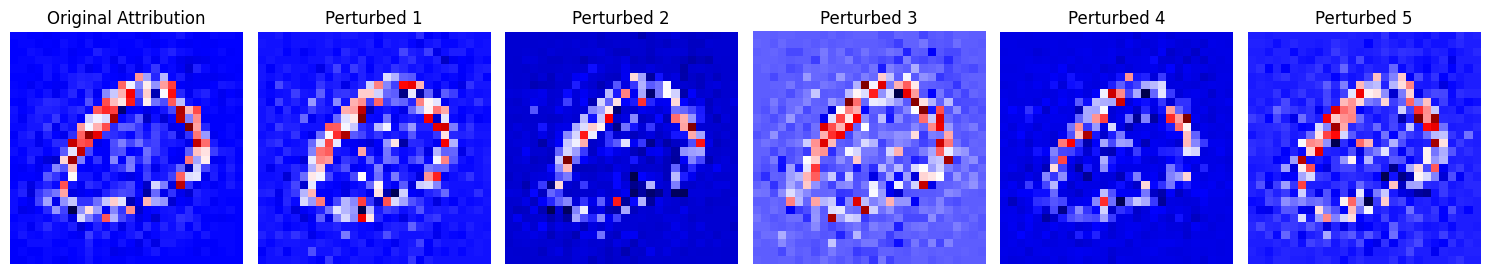

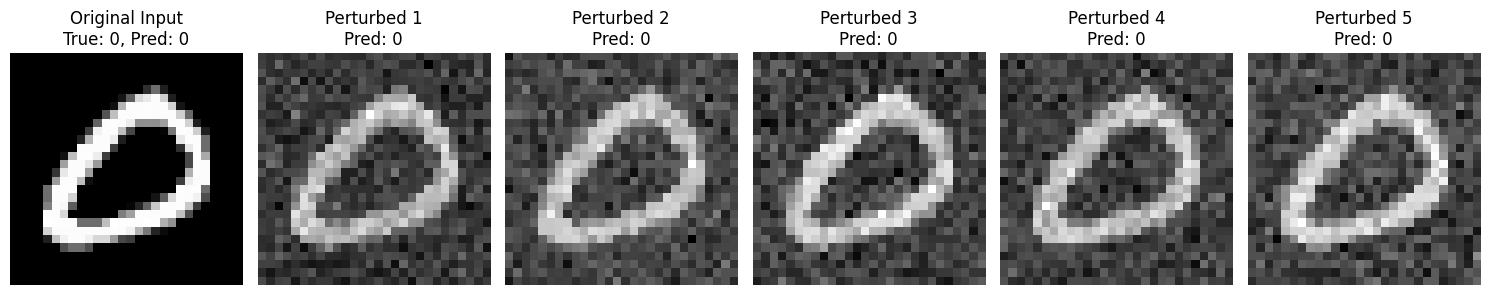



Sample 2: True Label = 6, Original Prediction = 6
Sensitivity Scores = [0.6818633470148985, 0.6168294077213504, 0.6354758061565648, 0.5552556450586442, 0.5819899594373111]
Average Similarity: 0.6143
Perturbed Predictions: [6, 6, 6, 6, 6]


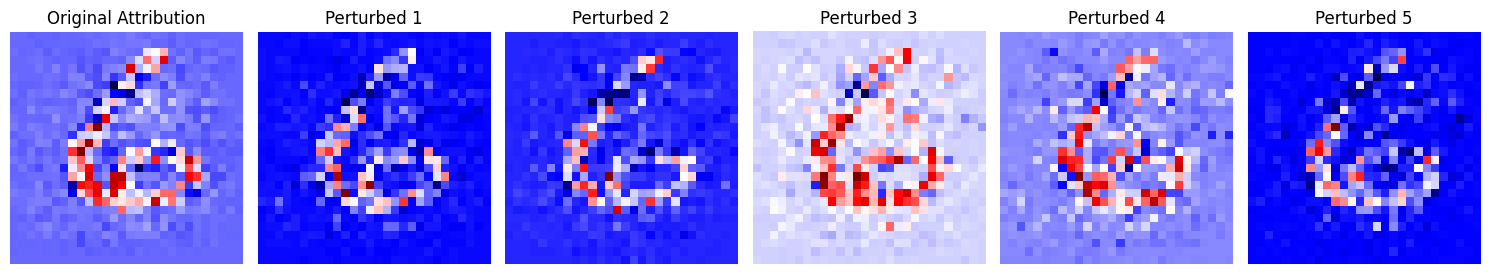

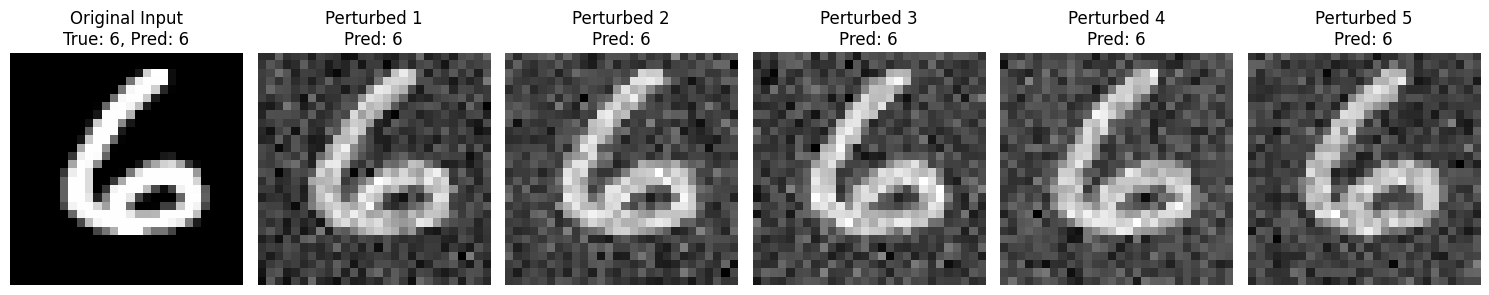



Sample 3: True Label = 1, Original Prediction = 1
Sensitivity Scores = [0.5052565039176828, 0.49406333754406095, 0.5842021078887416, 0.5187440474896602, 0.5170266555746001]
Average Similarity: 0.5239
Perturbed Predictions: [1, 1, 1, 1, 1]


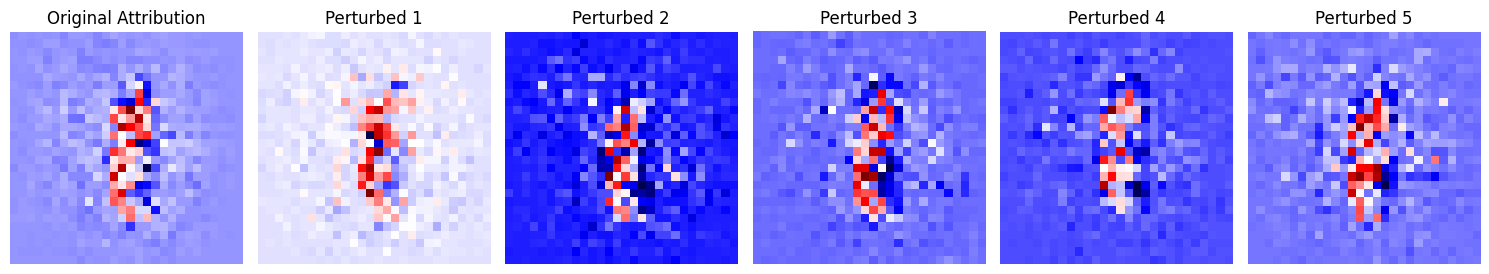

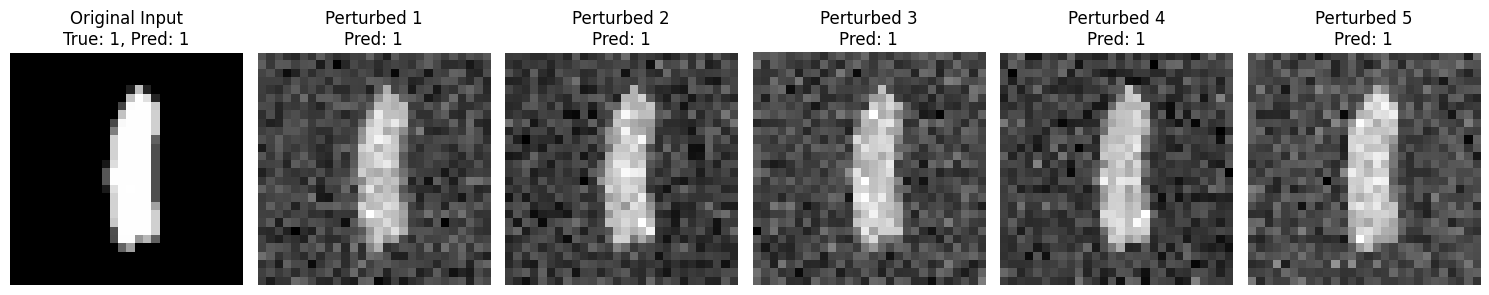



Sample 4: True Label = 8, Original Prediction = 8
Sensitivity Scores = [0.6297218736284457, 0.6353219393212115, 0.6266591956137122, 0.5024020827655862, 0.6218226737949677]
Average Similarity: 0.6032
Perturbed Predictions: [8, 8, 8, 8, 8]


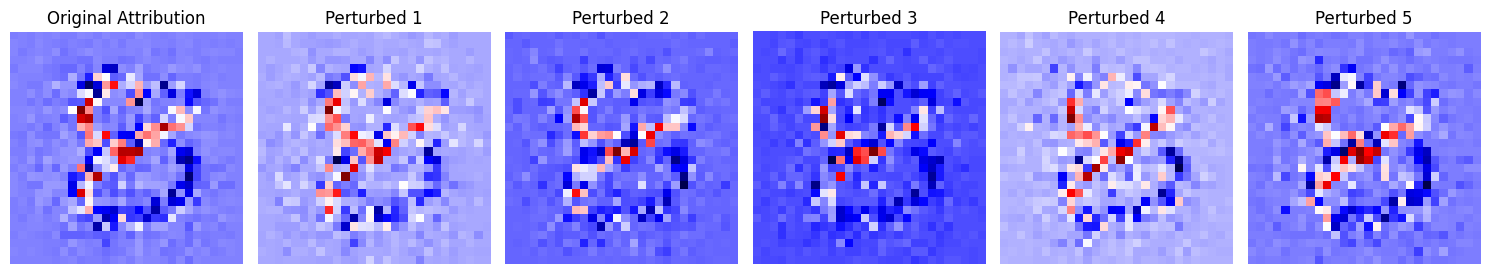

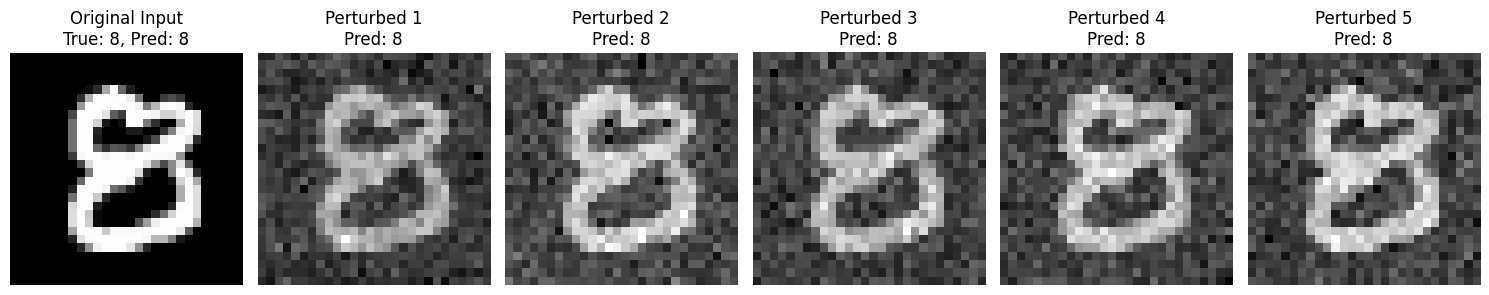



Sample 5: True Label = 2, Original Prediction = 2
Sensitivity Scores = [0.5768456151919317, 0.5974020836975107, 0.5874017673246282, 0.44644042588001476, 0.5804024483820903]
Average Similarity: 0.5577
Perturbed Predictions: [2, 2, 2, 2, 2]


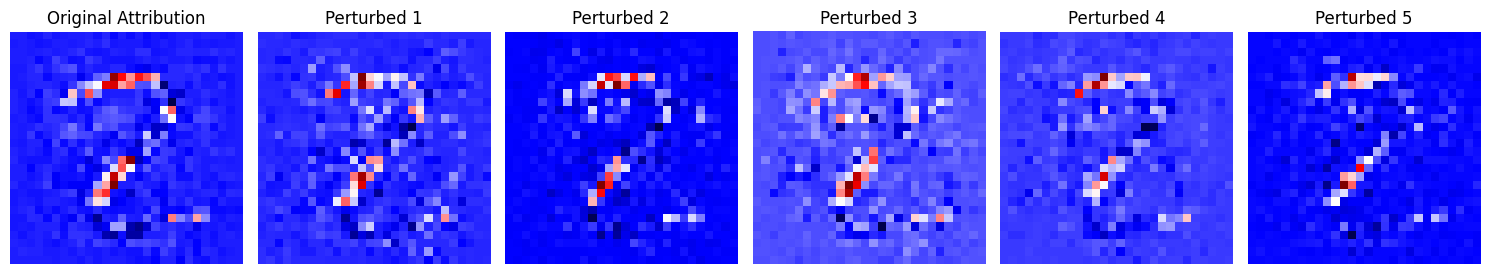

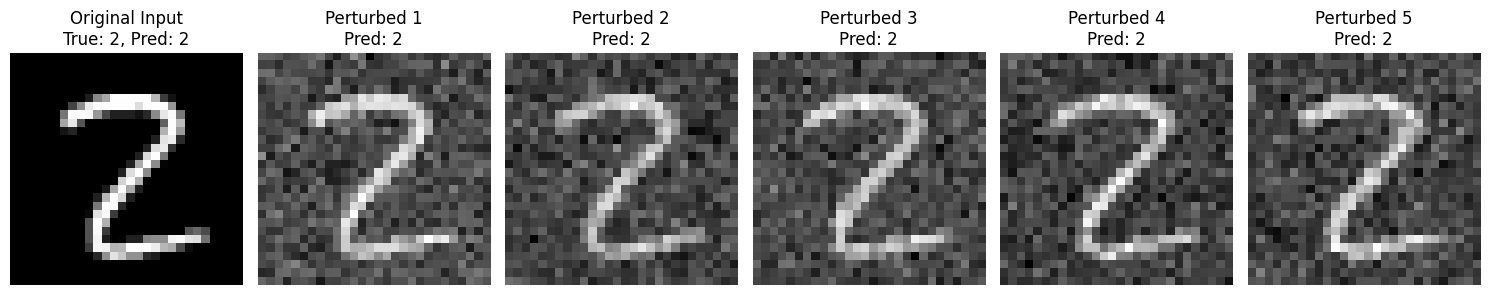

In [191]:
# Compute sensitivity scores and visualize attributions for each random sample
for i, random_index in enumerate(random_indices):
    # Retrieve the sample and label
    sample_input, sample_label = dataset[random_index]

    # Add batch dimension
    sample_input = sample_input.unsqueeze(0)

    # Define the baseline (e.g., a black image)
    baseline = torch.zeros_like(sample_input)

    # Get the predicted label
    predictions = wrapped_model(sample_input)
    predicted_label = torch.argmax(predictions, dim=1).item()

    # Perform sensitivity analysis with high noise level
    sensitivity_scores, original_attributions, all_attributions, perturbed_predictions = compute_sensitivity_analysis(
        wrapped_model, sample_input, baseline, predicted_label, noise_std=0.5, num_perturbations=5
    )

    print(f"\n\nSample {i + 1}: True Label = {sample_label}, Original Prediction = {predicted_label}")
    print(f"Sensitivity Scores = {sensitivity_scores}")
    print(f"Average Similarity: {np.mean(sensitivity_scores):.4f}")
    print(f"Perturbed Predictions: {perturbed_predictions}")

    # Visualize original and perturbed attributions
    plt.figure(figsize=(15, 5))

    # Plot original attributions
    plt.subplot(1, 6, 1)
    plt.imshow(original_attributions, cmap="seismic")
    plt.title("Original Attribution")
    plt.axis("off")

    # Plot perturbed attributions
    for j, perturbed_attribution in enumerate(all_attributions):
        plt.subplot(1, 6, j + 2)
        plt.imshow(perturbed_attribution, cmap="seismic")
        plt.title(f"Perturbed {j + 1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Visualize original and perturbed inputs
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 6, 1)
    plt.imshow(sample_input.squeeze().numpy(), cmap="gray")
    plt.title(f"Original Input\nTrue: {sample_label}, Pred: {predicted_label}")
    plt.axis("off")

    for j in range(len(all_attributions)):
        noise = torch.randn_like(sample_input) * 0.5  # High noise level
        perturbed_input = sample_input + noise
        plt.subplot(1, 6, j + 2)
        plt.imshow(perturbed_input.squeeze().numpy(), cmap="gray")
        plt.title(f"Perturbed {j + 1}\nPred: {perturbed_predictions[j]}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


In [193]:
# Function to apply challenging transformations
def apply_challenging_transformations(input_image):
    """
    Apply transformations designed to make the model struggle, including extreme rotations,
    heavy scaling, occlusion, and elastic distortions.

    Args:
        input_image: Input image tensor of shape (1, C, H, W).

    Returns:
        transformed_image: Transformed image tensor.
    """
    # Remove batch dimension
    image = input_image.squeeze(0)  # Now shape is (C, H, W)

    # Apply random extreme rotation
    angle = random.uniform(-90, 90)  # Rotate between -90 and 90 degrees
    image = TF.rotate(image, angle)

    # Apply heavy scaling
    scale = random.uniform(0.5, 1.5)  # Scale between 50% and 150%
    size = [int(image.shape[1] * scale), int(image.shape[2] * scale)]
    image = TF.resize(image, size)

    # Center crop back to original size
    image = TF.center_crop(image, (28, 28))  # Assuming original MNIST size is 28x28

    # Apply random occlusion
    occlusion_size = random.randint(5, 10)  # Occlusion size between 5x5 and 10x10
    x_start = random.randint(0, 28 - occlusion_size)
    y_start = random.randint(0, 28 - occlusion_size)
    image[:, y_start:y_start + occlusion_size, x_start:x_start + occlusion_size] = 0

    # Add batch dimension back
    transformed_image = image.unsqueeze(0)  # Shape is (1, C, H, W)

    return transformed_image

# Function to compute Sensitivity Analysis
def compute_sensitivity_analysis(model, input_image, baseline, target_class, num_perturbations=5):
    """
    Performs sensitivity analysis by applying challenging transformations to the input
    and comparing the resulting attributions.

    Args:
        model: The model to evaluate.
        input_image: Input image tensor of shape (1, C, H, W).
        baseline: Baseline image tensor of shape (1, C, H, W).
        target_class: The target class index for which the attributions are computed.
        num_perturbations: Number of perturbed inputs to generate.

    Returns:
        sensitivity_scores: List of similarity scores between original and perturbed attributions.
        all_attributions: List of all perturbed attributions.
        predictions: List of model predictions for perturbed inputs.
    """
    # Initialize Integrated Gradients
    ig = IntegratedGradients(model)

    # Compute original attributions
    original_attributions = ig.attribute(input_image, baseline, target=target_class).squeeze().detach().numpy()

    sensitivity_scores = []
    all_attributions = []
    predictions = []

    for _ in range(num_perturbations):
        # Apply challenging transformations to the input image
        perturbed_input = apply_challenging_transformations(input_image)

        # Compute attributions for the perturbed input
        perturbed_attributions = ig.attribute(perturbed_input, baseline, target=target_class).squeeze().detach().numpy()
        all_attributions.append(perturbed_attributions)

        # Get model prediction for the perturbed input
        perturbed_prediction = torch.argmax(model(perturbed_input), dim=1).item()
        predictions.append(perturbed_prediction)

        # Compute similarity between original and perturbed attributions
        similarity, _ = ssim(
            original_attributions,
            perturbed_attributions,
            data_range=original_attributions.max() - original_attributions.min(),
            full=True
        )
        sensitivity_scores.append(similarity)

    return sensitivity_scores, original_attributions, all_attributions, predictions



Sample 1: True Label = 0, Original Prediction = 0
Sensitivity Scores = [0.059793138450967745, 0.04107835140488418, 0.1965300504204347, 0.053510568562986, 0.06678937101256766]
Average Similarity: 0.0835
Perturbed Predictions: [0, 9, 0, 6, 9]


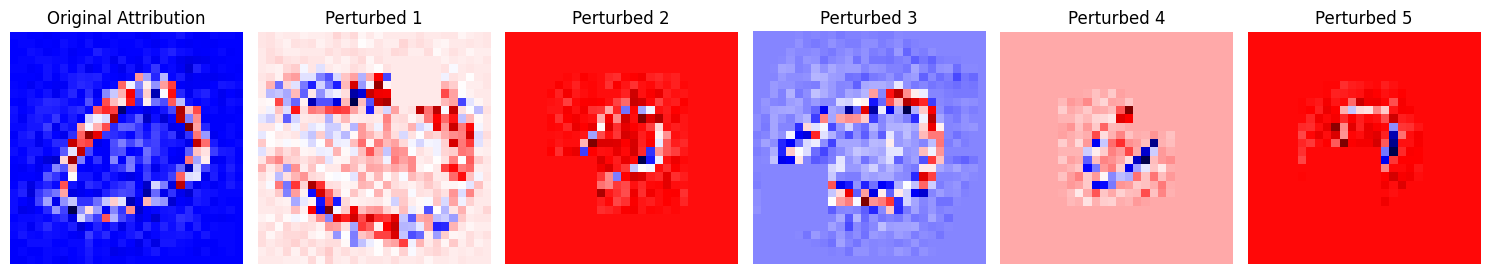

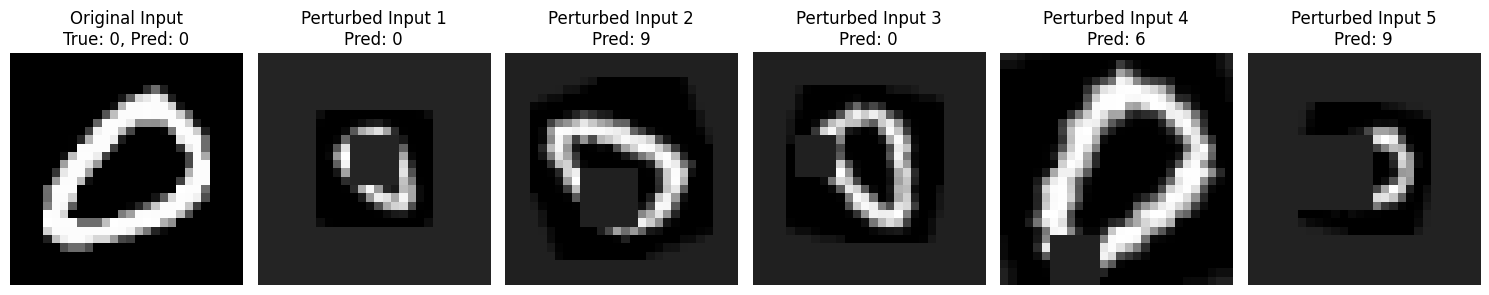



Sample 2: True Label = 6, Original Prediction = 6
Sensitivity Scores = [0.06251824476351692, 0.0920744117143423, 0.1806874799449898, 0.3264081313064152, 0.06937791145576809]
Average Similarity: 0.1462
Perturbed Predictions: [5, 4, 6, 6, 5]


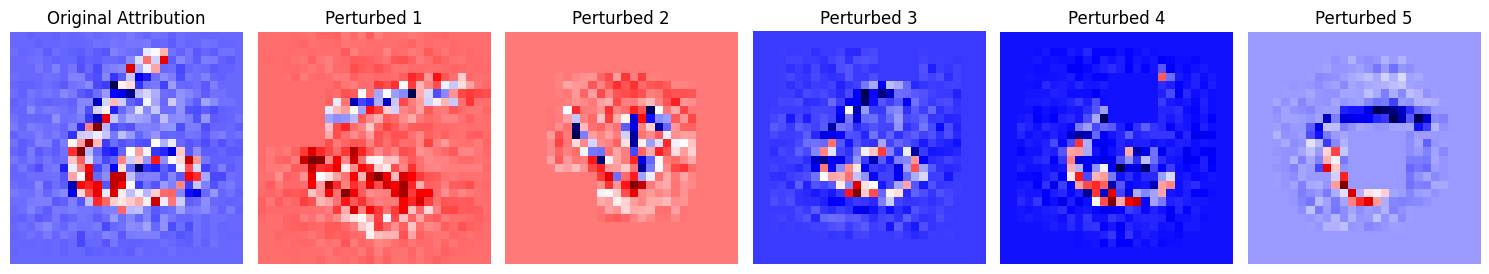

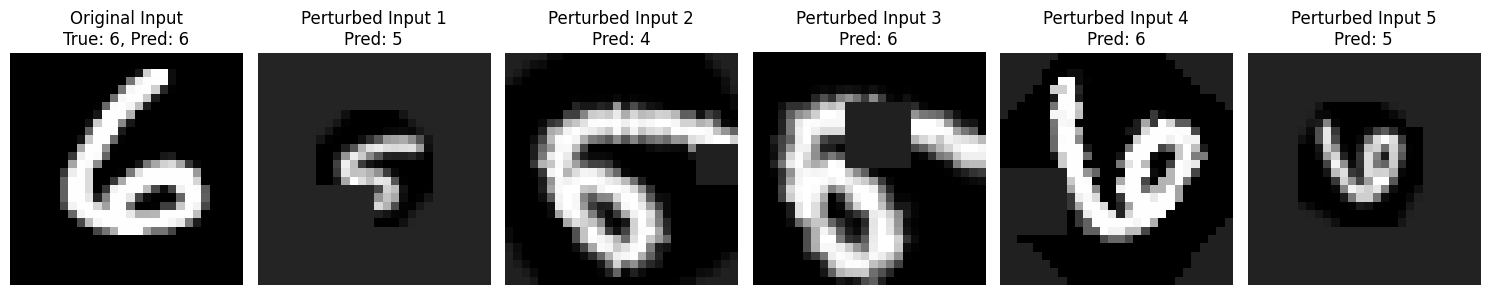



Sample 3: True Label = 1, Original Prediction = 1
Sensitivity Scores = [0.20653823480703662, 0.26328641093114497, 0.45749085084949853, 0.45180387230152613, 0.14958708328948359]
Average Similarity: 0.3057
Perturbed Predictions: [4, 8, 1, 1, 4]


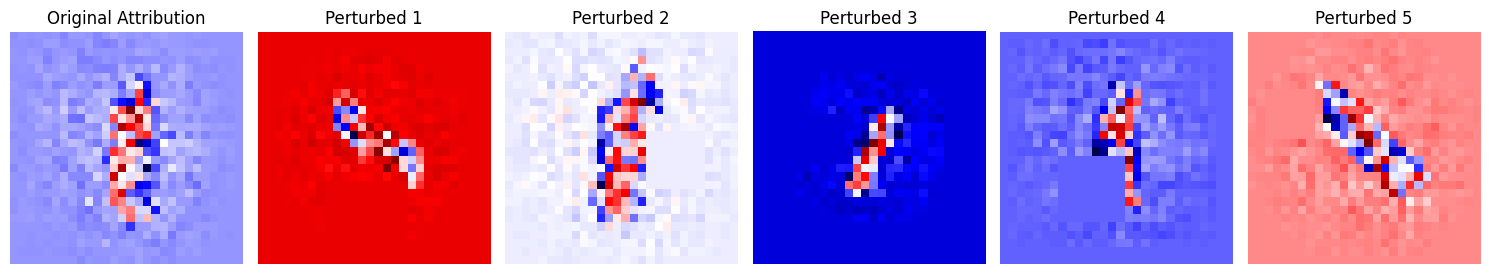

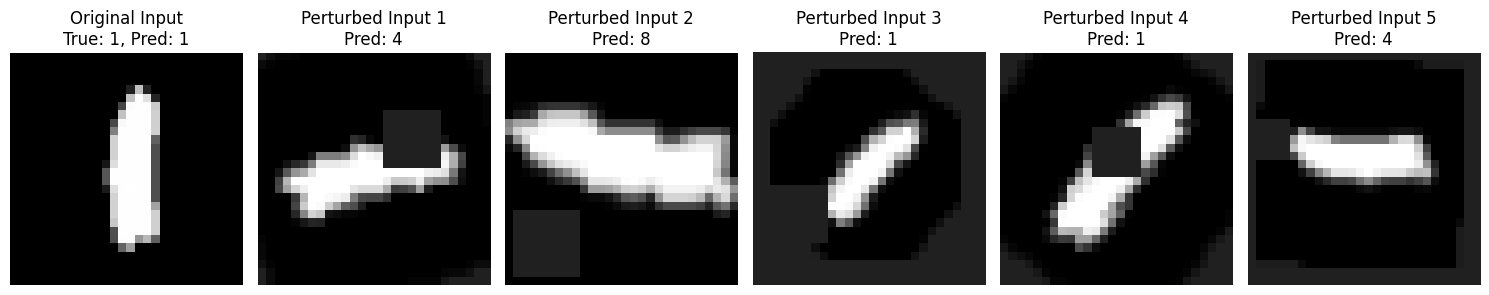



Sample 4: True Label = 8, Original Prediction = 8
Sensitivity Scores = [0.06044385402328543, 0.03560983867091319, 0.12381310588990992, 0.12932213400397788, 0.10388453759412591]
Average Similarity: 0.0906
Perturbed Predictions: [2, 8, 0, 8, 3]


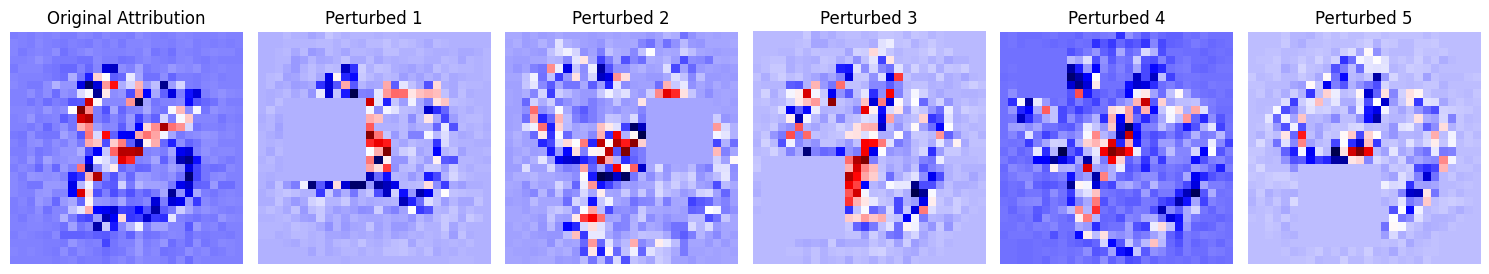

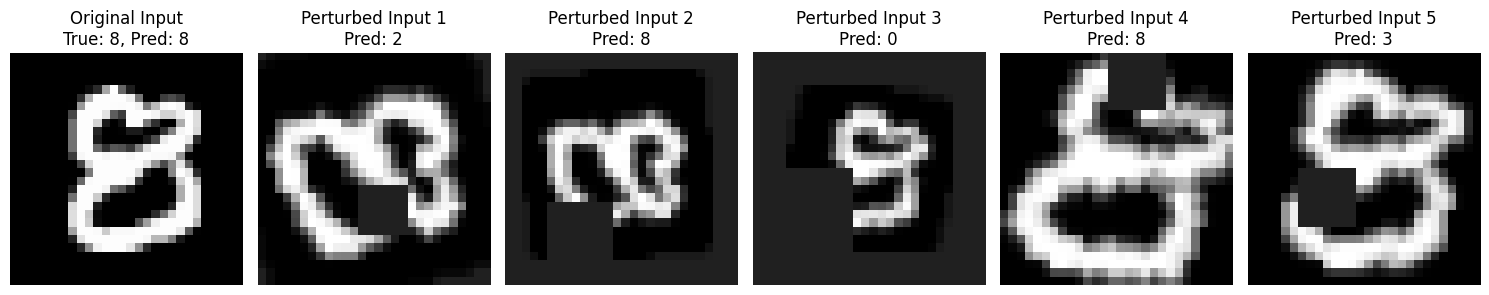



Sample 5: True Label = 2, Original Prediction = 2
Sensitivity Scores = [0.30452759204452634, 0.028687505075182657, 0.04516533125311205, 0.035923579103180885, 0.13385457547172935]
Average Similarity: 0.1096
Perturbed Predictions: [2, 4, 3, 4, 2]


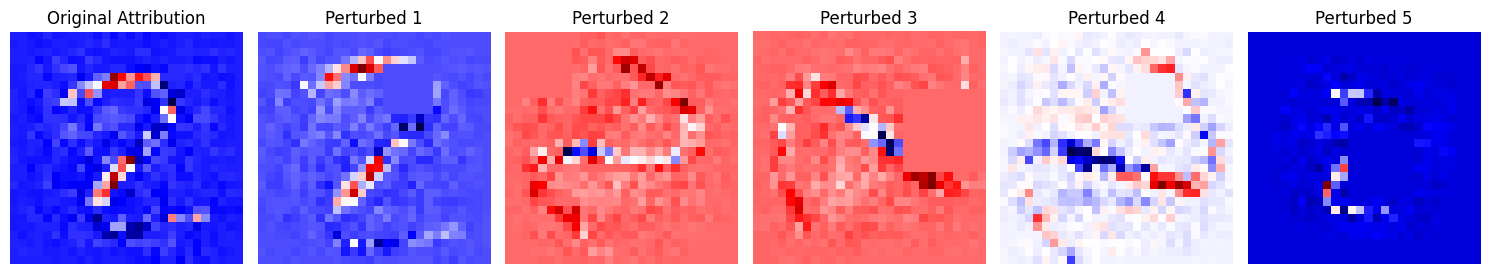

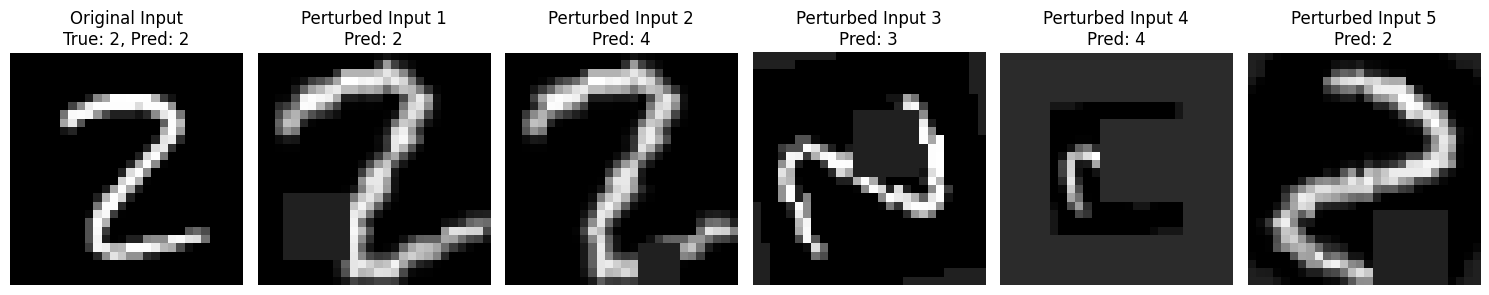

In [194]:
# Compute sensitivity scores and visualize attributions for each random sample
for i, random_index in enumerate(random_indices):
    # Retrieve the sample and label
    sample_input, sample_label = dataset[random_index]

    # Add batch dimension
    sample_input = sample_input.unsqueeze(0)

    # Define the baseline (e.g., a black image)
    baseline = torch.zeros_like(sample_input)

    # Get the predicted label
    predictions = wrapped_model(sample_input)
    predicted_label = torch.argmax(predictions, dim=1).item()

    # Perform sensitivity analysis with challenging transformations
    sensitivity_scores, original_attributions, all_attributions, perturbed_predictions = compute_sensitivity_analysis(
        wrapped_model, sample_input, baseline, predicted_label, num_perturbations=5
    )

    print(f"\n\nSample {i + 1}: True Label = {sample_label}, Original Prediction = {predicted_label}")
    print(f"Sensitivity Scores = {sensitivity_scores}")
    print(f"Average Similarity: {np.mean(sensitivity_scores):.4f}")
    print(f"Perturbed Predictions: {perturbed_predictions}")

    # Visualize original and perturbed attributions
    plt.figure(figsize=(15, 5))

    # Plot original attributions
    plt.subplot(1, 6, 1)
    plt.imshow(original_attributions, cmap="seismic")
    plt.title(f"Original Attribution")
    plt.axis("off")

    # Plot perturbed attributions
    for j, perturbed_attribution in enumerate(all_attributions):
        plt.subplot(1, 6, j + 2)
        plt.imshow(perturbed_attribution, cmap="seismic")
        plt.title(f"Perturbed {j + 1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Visualize perturbed inputs
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 6, 1)
    plt.imshow(sample_input.squeeze().numpy(), cmap="gray")
    plt.title(f"Original Input\nTrue: {sample_label}, Pred: {predicted_label}")
    plt.axis("off")

    for j in range(len(all_attributions)):
        perturbed_input = apply_challenging_transformations(sample_input)
        plt.subplot(1, 6, j + 2)
        plt.imshow(perturbed_input.squeeze().numpy(), cmap="gray")
        plt.title(f"Perturbed Input {j + 1}\nPred: {perturbed_predictions[j]}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


Attribution Maps and Color Legend
Attributions Represent Impact on the Model's Decision:

The attribution map shows how each pixel in the input image contributes to the model's decision for the selected label.
Pixels with higher absolute attribution values have a greater impact on the prediction.
Color Encoding (Assuming hot Colormap):

Red/Yellow (Positive Values):
These regions positively contribute to the predicted label.
The model considers these areas as evidence for the prediction.
Black/Blue (Negative Values):
These regions negatively contribute to the predicted label.
The model considers these areas as evidence against the prediction.
White/Gray (Near Zero Values):
These regions have little to no impact on the prediction.
Interpretation of a Black Dot:

A black dot (or dark blue, depending on your colormap) represents a strong negative contribution in the attribution process.
This means the model interprets that pixel as reducing confidence in the predicted label.
Interpretation of a White Dot:

A white dot (or light gray) represents a neutral contribution (close to zero attribution).
The model finds that pixel irrelevant to its decision for the predicted label.


Legend for Seismic Colormap
Red (Positive Values):

Indicates a positive contribution to the model's prediction for the selected label.
The model considers these pixels as evidence supporting the predicted label.
Darker red = stronger positive contribution.
Blue (Negative Values):

Indicates a negative contribution to the model's prediction for the selected label.
The model considers these pixels as evidence against the predicted label.
Darker blue = stronger negative contribution.
White (Near Zero Values):

Indicates a neutral or insignificant contribution to the model's decision.
These pixels have little to no influence on the predicted label.
Scale Interpretation
The range of values in the attribution map depends on the magnitude of the attributions produced by Integrated Gradients. Typically:
+1 (Bright Red): Strong positive influence.
-1 (Bright Blue): Strong negative influence.
0 (White): No contribution.
If your attributions don’t fall neatly into this range, Captum will automatically normalize the values to fit the colormap.

### LIME

In [26]:
# On Google Colab, install LIME
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e933e8ac7272ff929b0e93ea3ab3d9804232ed2b31644d0f2b37215828ffccdc
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [27]:
# Import needed libraries
from lime import lime_image
from skimage.segmentation import mark_boundaries, slic
from skimage.color import gray2rgb, rgb2gray, label2rgb
from lime.wrappers.scikit_image import SegmentationAlgorithm


In [ ]:
# Get the dataset
dataset = mnist_test_dl.dataset
total_samples = len(dataset)

# Randomly pick indices for the samples
random_indices = torch.randint(0, total_samples, (num_samples,)).tolist()

In [ ]:
# Dataset
data_iter = iter(mnist_test_dl)
images, labels = next(data_iter)

# Number of random samples to analyze
num_samples = 5

In [ ]:
# ==> CHOOSE THE BEST SEGMENTATION ALGORITHM <==
segmenter = SegmentationAlgorithm('slic', n_segments=100, compactness=10)
# segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=150, ratio=0.2)
# segmenter = SegmentationAlgorithm('felzenszwalb', scale=100, sigma=0.8, min_size=5)

In [ ]:
def predict_function(images):
    """
    Prediction function for LIME.
    Takes RGB images, converts them to grayscale, and returns probabilities.
    """
    # Convert RGB (3 channels) to grayscale (1 channel)
    grayscale_images = np.array([rgb2gray(image) for image in images])  # Shape: (batch_size, H, W)

    # Add the channel dimension for PyTorch model compatibility
    grayscale_images = np.expand_dims(grayscale_images, axis=1)  # Shape: (batch_size, 1, H, W)

    # Normalize images
    images_tensor = torch.tensor(grayscale_images).float()
    images_tensor = (images_tensor - 0.1307) / 0.3081  # MNIST normalization

    # Pass through the model
    with torch.no_grad():
        outputs = mnist_SENN(images_tensor)
        logits = outputs[0]

    return logits.softmax(dim=1).numpy()  # Convert logits to probabilities

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

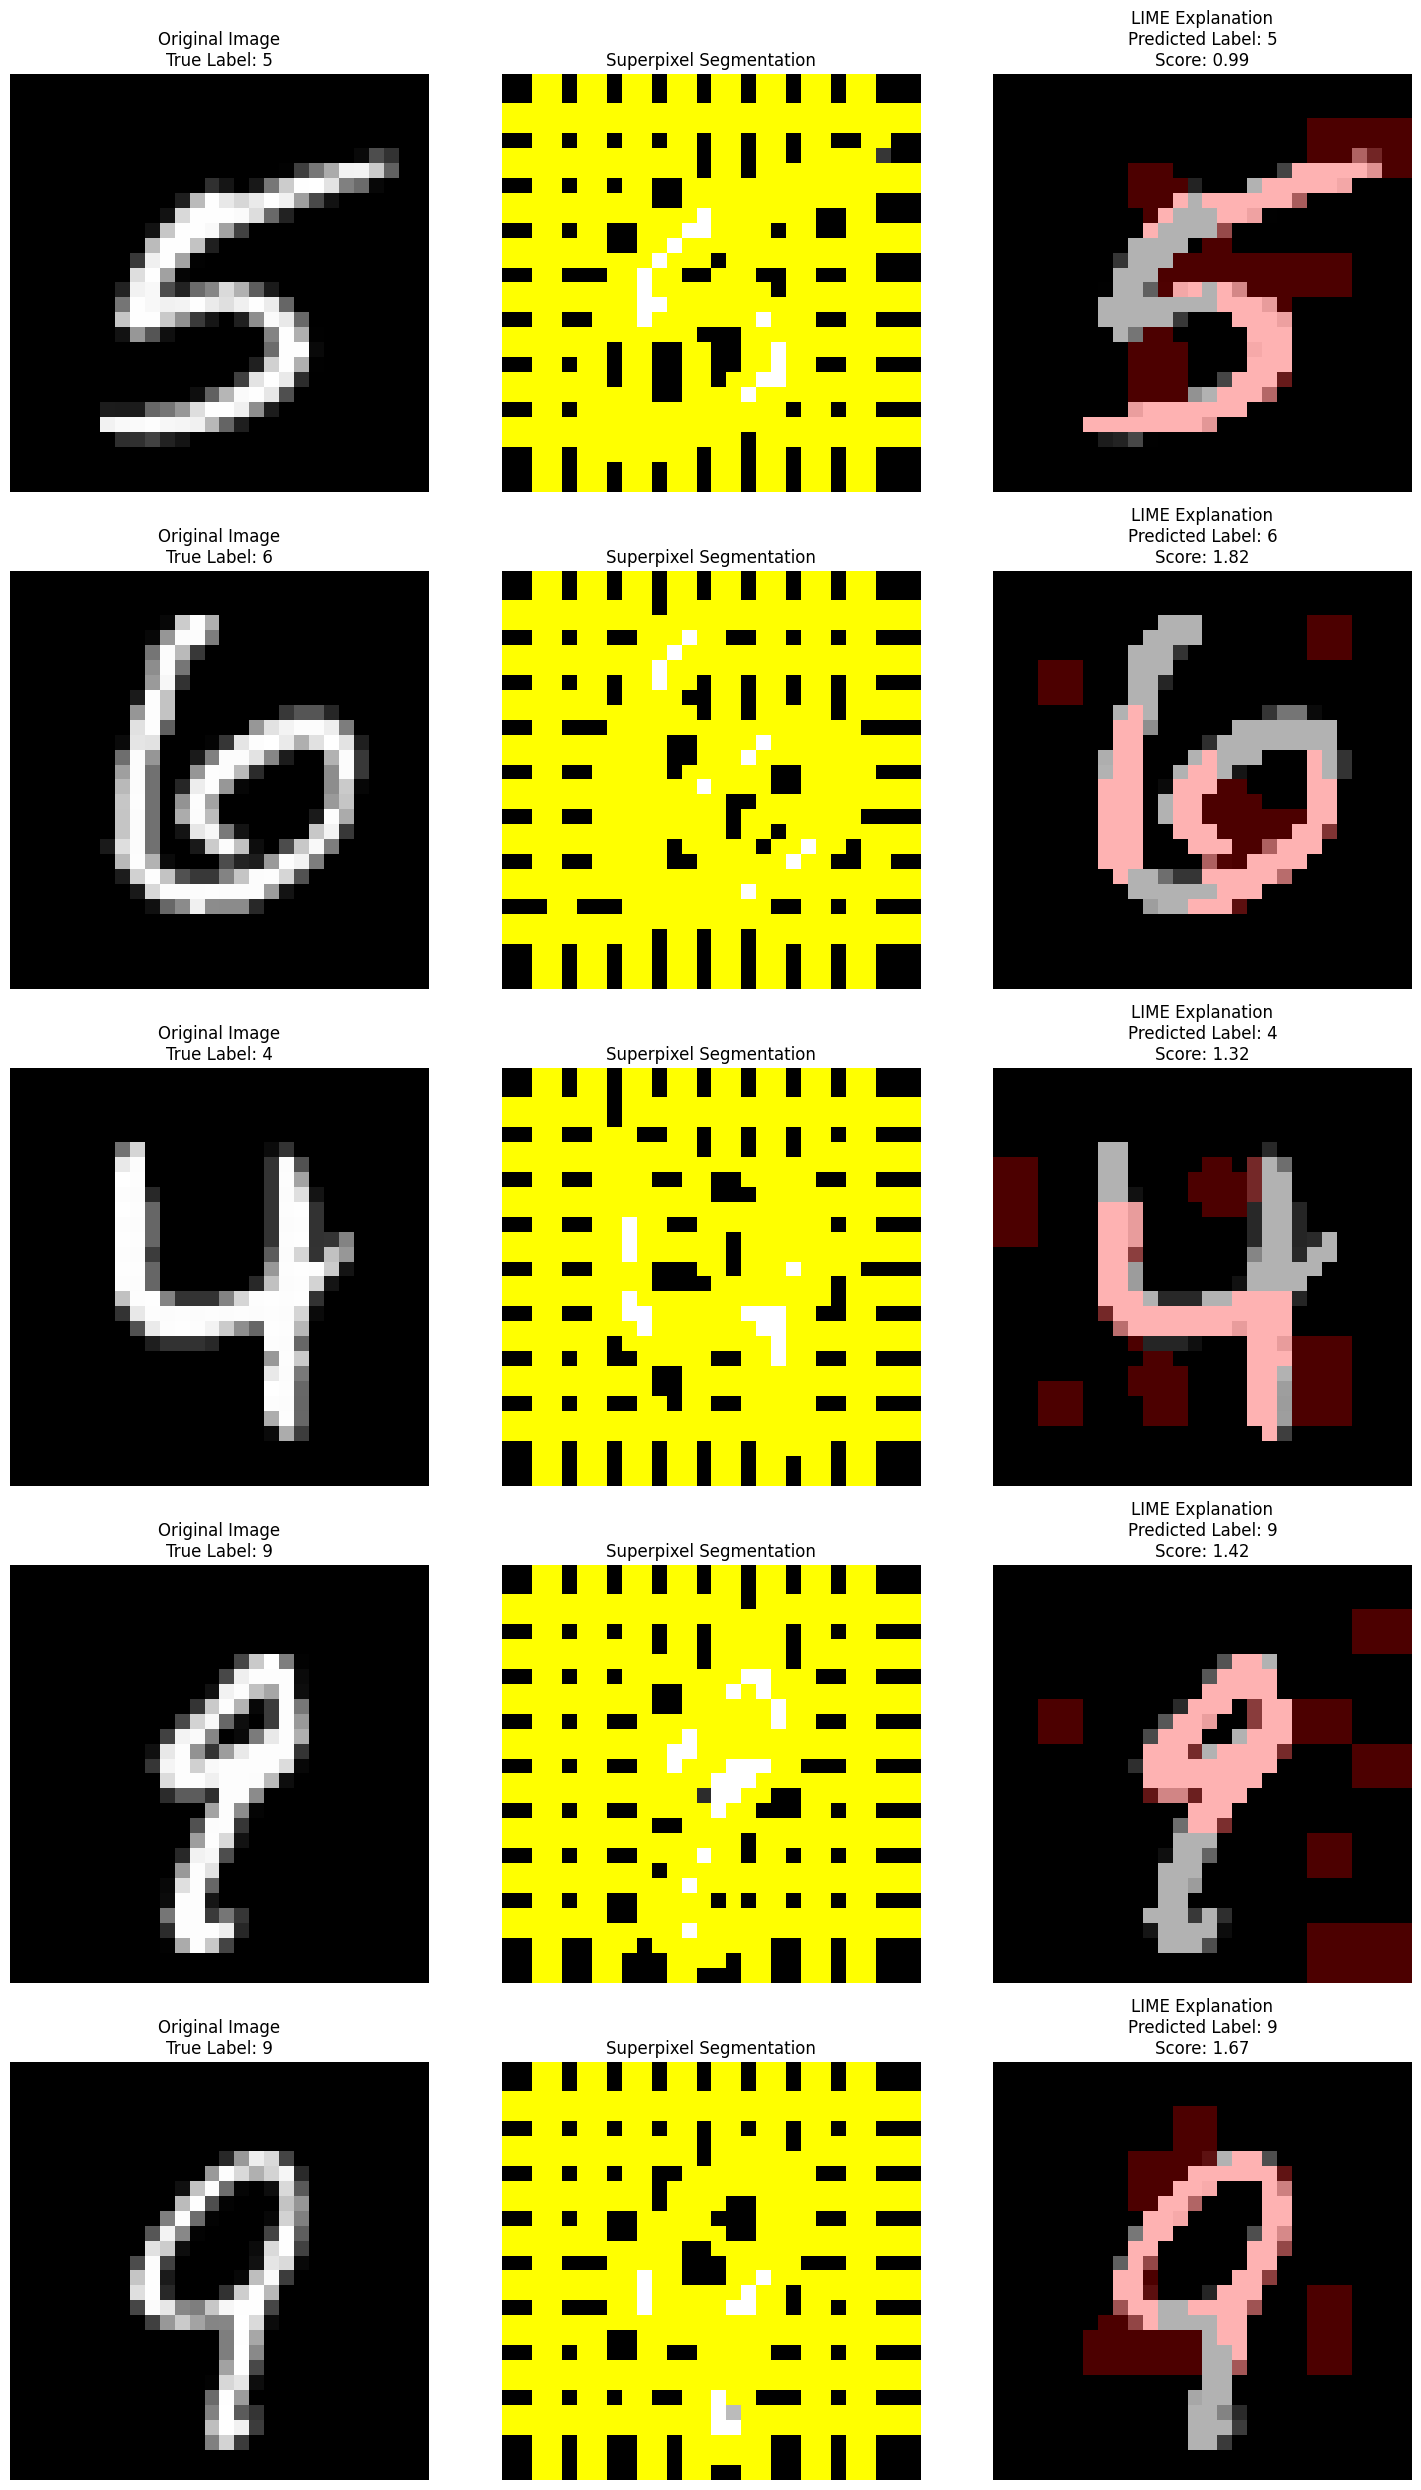

In [168]:
# Ensure reproducibility
torch.manual_seed(100)
np.random.seed(100)

# Select random indices for the samples
random_indices = random.sample(range(images.size(0)), num_samples)

# Initialize the LIME Image Explainer
explainer = lime_image.LimeImageExplainer()

# Initialize the figure
fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))

for i, random_index in enumerate(random_indices):
    # Select the image and label at the random index
    sample_image = images[random_index].squeeze(0).numpy()  # Convert to 2D array
    sample_label = labels[random_index].item()  # Get label as integer

    # Convert grayscale image to RGB
    sample_image_rgb = gray2rgb(sample_image)  # Convert grayscale to RGB (HxWxC)

    # Generate LIME explanation
    explanation = explainer.explain_instance(
        image=sample_image_rgb,
        classifier_fn=predict_function,
        top_labels=1,
        hide_color=0,
        num_samples=1000,
        segmentation_fn=segmenter
    )

    # Get the explanation mask
    temp, mask = explanation.get_image_and_mask(
        label=explanation.top_labels[0],
        positive_only=True,  # Highlight only positive contributions
        num_features=10,
        hide_rest=False
    )

    # Extract explanation score (sum of positive contributions)
    explanation_score = sum(
        weight for feature, weight in explanation.local_exp[explanation.top_labels[0]]
        if weight > 0
    )

    # Clip the temp image to ensure valid intensity values
    temp = np.clip(temp, 0, 1)

    # Generate the LIME explanation overlay
    rgb_output = label2rgb(mask, temp, bg_label=0)

    # Clip the RGB output to valid range for floats ([0, 1])
    rgb_output = np.clip(rgb_output, 0, 1)

    # Visualize original image
    axes[i, 0].imshow(sample_image, cmap='gray')
    axes[i, 0].set_title(f"Original Image\nTrue Label: {sample_label}")
    axes[i, 0].axis('off')

    # Visualize superpixel segmentation
    axes[i, 1].imshow(mark_boundaries(sample_image_rgb, segmenter(sample_image_rgb)))
    axes[i, 1].set_title("Superpixel Segmentation")
    axes[i, 1].axis('off')

    # Visualize LIME explanation with overlay
    axes[i, 2].imshow(rgb_output, interpolation='nearest')
    axes[i, 2].set_title(
        f"LIME Explanation\nPredicted Label: {explanation.top_labels[0]}\nScore: {explanation_score:.2f}"
    )
    axes[i, 2].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


Try with different segmentationalAlgorithms, like for example:
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=150, ratio=0.2)

segmenter = SegmentationAlgorithm('slic', n_segments=50, compactness=10)

segmenter = SegmentationAlgorithm('felzenszwalb', scale=100, sigma=0.8, min_size=5)

EXPLAIN THE SCORE

In some cases, a region is important not because of what it contains but because of what it lacks. This is especially true in cases where:

The absence of a feature prevents the model from misclassifying the input.
The presence of a feature would have pushed the prediction toward a competing class.



In [ ]:
random_index = 118

  0%|          | 0/1000 [00:00<?, ?it/s]

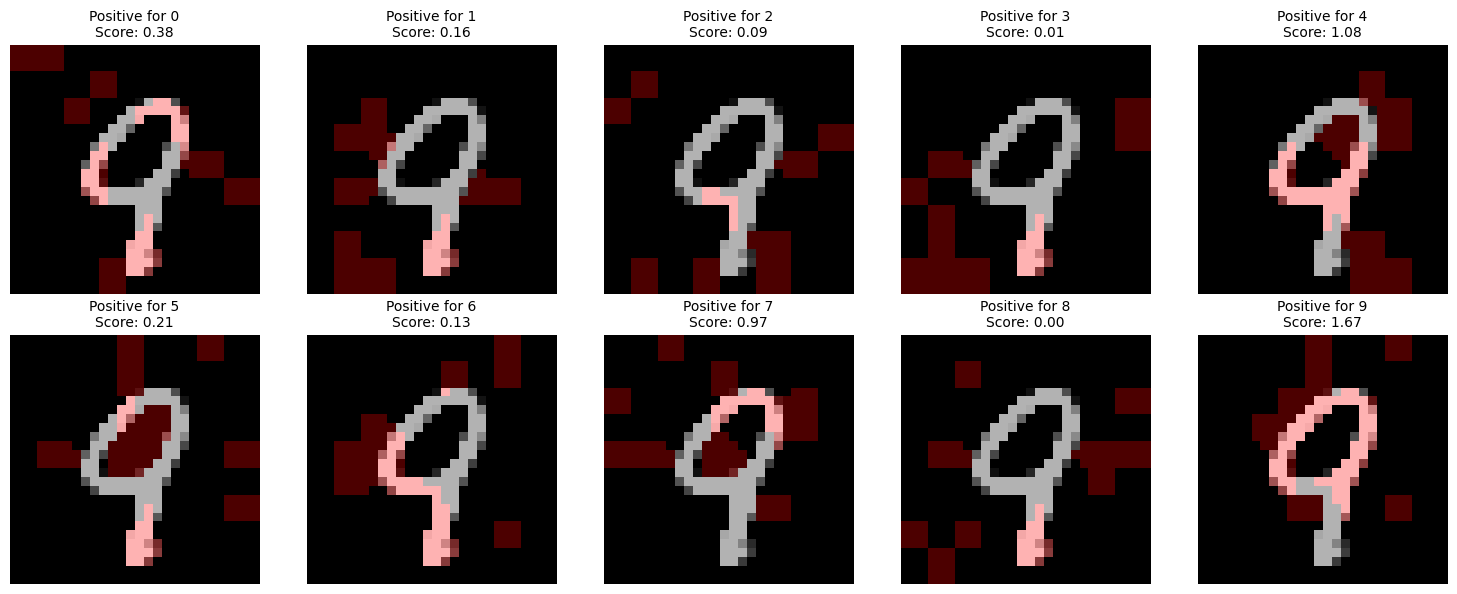

In [170]:
# Initialize the figure for a 2x5 grid (10 classes in total)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))


# Select the image and label at the random index
sample_image = images[random_index].squeeze(0).numpy()  # Convert to 2D array
sample_label = labels[random_index].item()  # Get label as integer

# Convert grayscale image to RGB
sample_image_rgb = gray2rgb(sample_image)  # Convert grayscale to RGB (HxWxC)

# Generate LIME explanation for the fixed sample
explanation = explainer.explain_instance(
    image=sample_image_rgb,
    classifier_fn=predict_function,
    top_labels=10,  # Ensure LIME evaluates all classes (0-9)
    hide_color=0,
    num_samples=1000,
    segmentation_fn=segmenter
)

# Loop over all labels (0-9)
for label in range(10):
    # Get the explanation mask for the current label
    temp, mask = explanation.get_image_and_mask(
        label=label,  # Force LIME to generate explanation for the given label
        positive_only=True,  # Highlight only positive contributions
        num_features=10,
        hide_rest=False
    )

    # Ensure no negative intensities in `temp`
    temp = np.clip(temp, 0, 1)  # Clip to valid range [0, 1]

    # Extract explanation score for the current label
    explanation_score = sum(
        weight for feature, weight in explanation.local_exp[label]
        if weight > 0
    )

    # Generate the LIME explanation overlay
    rgb_output = label2rgb(mask, temp, bg_label=0)

    # Clip the RGB output to valid range for floats ([0, 1])
    rgb_output = np.clip(rgb_output, 0, 1)

    # Determine grid position
    row, col = divmod(label, 5)

    # Plot the LIME explanation in the grid
    axes[row, col].imshow(rgb_output, interpolation='nearest')
    axes[row, col].set_title(
        f"Positive for {label}\nScore: {explanation_score:.2f}", fontsize=10
    )
    axes[row, col].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [183]:
def predict_on_masked_superpixels(image, superpixel_steps=[1, 3, 5, 10, 20]):
    """
    Visualize the impact of masking specific numbers of top superpixels on the image,
     highlighting masked regions.

    Parameters:
        image (numpy.ndarray): Grayscale image to analyze (28x28).
        superpixel_steps (list): List of numbers of top superpixels to mask.

    Returns:
        None
    """
    # Convert grayscale image to RGB
    image_rgb = gray2rgb(image)  # Convert grayscale to RGB (HxWxC)

    # Generate LIME explanation
    explanation = explainer.explain_instance(
        image=image_rgb,
        classifier_fn=predict_function,
        top_labels=1,
        hide_color=0,
        num_samples=1000,
        segmentation_fn=segmenter
    )

    # Get the predicted label and original confidence
    predicted_label = explanation.top_labels[0]
    original_confidence = predict_function([image_rgb])[0, predicted_label]

    # Print original confidence
    print(f"Original Confidence for Predicted Label {predicted_label}: {original_confidence:.2f}")

    # Get the top superpixels ranked by importance
    importance_scores = explanation.local_exp[predicted_label]
    importance_scores.sort(key=lambda x: x[1], reverse=True)  # Sort by importance
    top_superpixels = [idx for idx, _ in importance_scores]

    # Print superpixel importance scores
    print(f"Top Superpixel Importance Scores: {importance_scores[:10]}")  # Show top 10 for brevity

    # Initialize the figure for 2 rows (perturbed image, masked regions)
    num_steps = len(superpixel_steps)
    fig, axes = plt.subplots(2, num_steps, figsize=(4 * num_steps, 8))
    plt.suptitle(f"True Label: {predicted_label}", fontsize=16)

    # Iteratively mask the selected numbers of top superpixels and visualize
    for i, k in enumerate(superpixel_steps):
        perturbed_image = np.copy(image_rgb)
        segments = explanation.segments

        # Create a mask image (red for masked regions)
        mask_visualization = np.copy(image_rgb)

        # Mask the top-k superpixels
        for superpixel in top_superpixels[:k]:
            perturbed_image[segments == superpixel] = 0  # Mask superpixel with black
            mask_visualization[segments == superpixel] = [1, 0, 0]  # Highlight in red

        # Predict confidence and class after perturbation
        perturbed_probabilities = predict_function([perturbed_image])[0]
        perturbed_confidence = perturbed_probabilities[predicted_label]
        perturbed_prediction = np.argmax(perturbed_probabilities)

        # Compute confidence drop
        confidence_drop = (original_confidence - perturbed_confidence) / original_confidence

        # Print details for the current step
        print(f"\nTop-{k} Masked:")
        print(f"    Perturbed Confidence: {perturbed_confidence:.2f}")
        print(f"    Confidence Drop: {confidence_drop:.2%}")
        print(f"    Predicted Label After Masking: {perturbed_prediction}")

        # Plot the perturbed image
        axes[0, i].imshow(perturbed_image, interpolation='nearest')
        axes[0, i].set_title(
            f"Top-{k} Masked\nConf Drop: {confidence_drop:.2%}\nPred: {perturbed_prediction}",
            fontsize=10
        )
        axes[0, i].axis('off')

        # Plot the mask visualization
        axes[1, i].imshow(mask_visualization, interpolation='nearest')
        axes[1, i].set_title(f"Masked Superpixels (Top-{k})", fontsize=10)
        axes[1, i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()


Sample 1 - True Label: 1


  0%|          | 0/1000 [00:00<?, ?it/s]

Original Confidence for Predicted Label 1: 1.00
Top Superpixel Importance Scores: [(43, 0.06604308916119409), (23, 0.058265313090314484), (42, 0.05107985097997373), (22, 0.025325018058011486), (40, 0.017919674410137917), (32, 0.01726323149553721), (62, 0.016656214097599615), (48, 0.01655396948441855), (33, 0.014585913877274374), (24, 0.014119495312035258)]



Top-1 Masked:
    Perturbed Confidence: 1.00
    Confidence Drop: 0.00%
    Predicted Label After Masking: 1

Top-3 Masked:
    Perturbed Confidence: 1.00
    Confidence Drop: 0.21%
    Predicted Label After Masking: 1

Top-5 Masked:
    Perturbed Confidence: 0.99
    Confidence Drop: 0.69%
    Predicted Label After Masking: 1

Top-10 Masked:
    Perturbed Confidence: 0.30
    Confidence Drop: 70.20%
    Predicted Label After Masking: 7

Top-20 Masked:
    Perturbed Confidence: 0.06
    Confidence Drop: 94.29%
    Predicted Label After Masking: 7


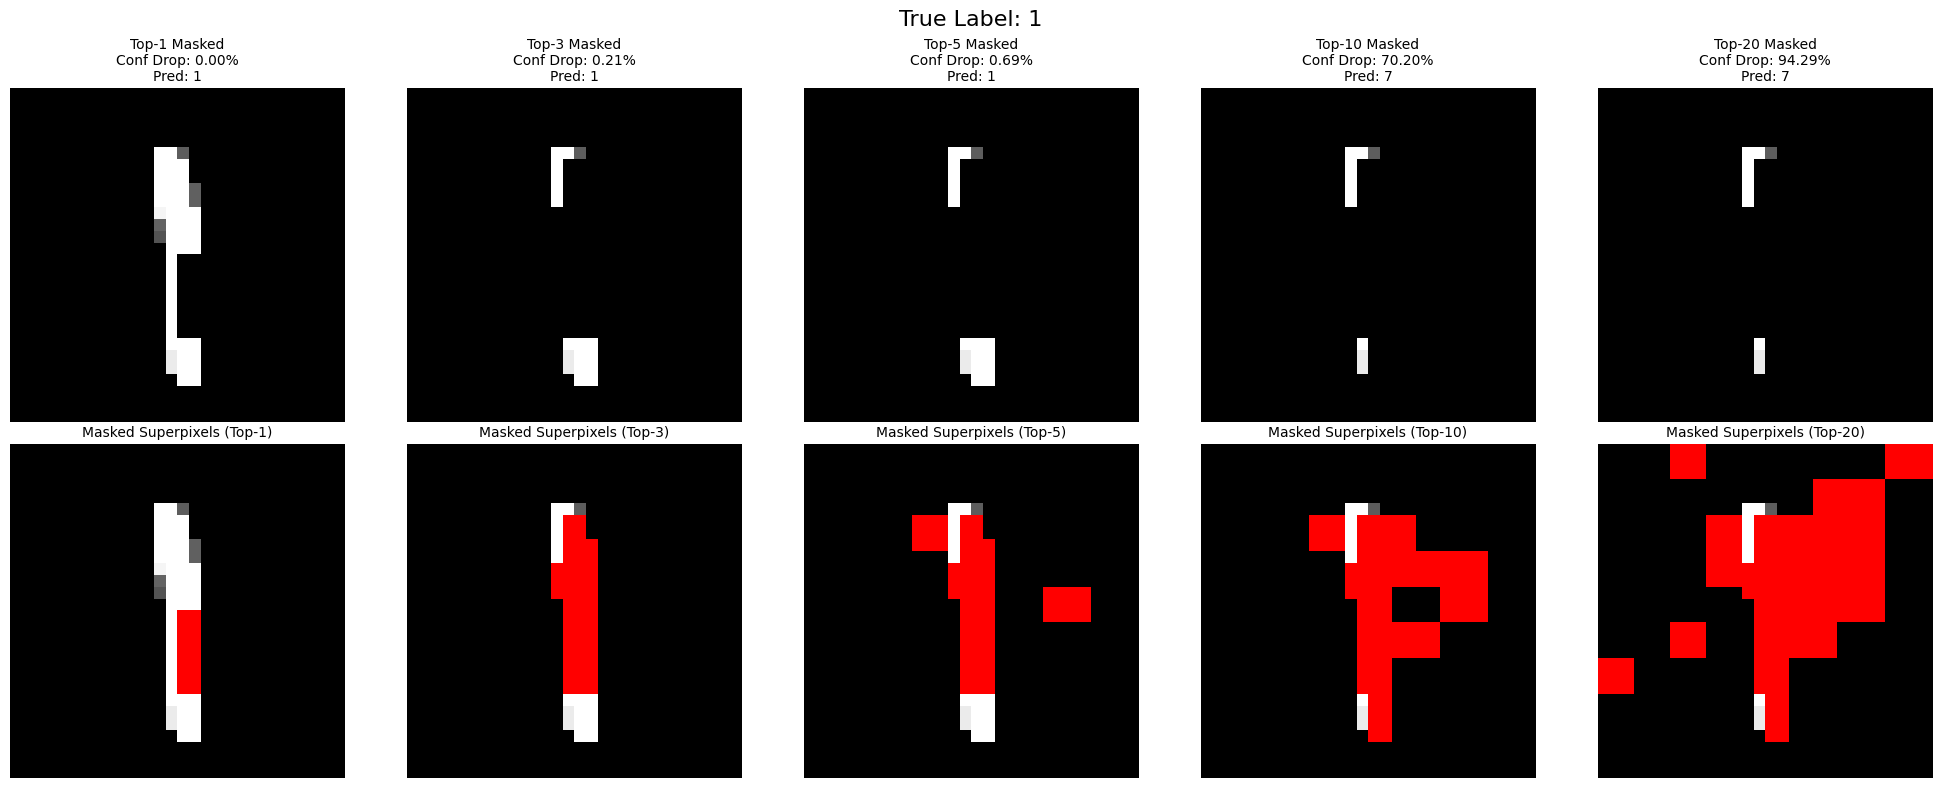

Sample 2 - True Label: 4


  0%|          | 0/1000 [00:00<?, ?it/s]

Original Confidence for Predicted Label 4: 1.00
Top Superpixel Importance Scores: [(25, 0.08503051478502446), (37, 0.08386712289624787), (38, 0.06599883190545672), (23, 0.042094891908537144), (35, 0.03175858812671056), (27, 0.027155024536625348), (46, 0.024933462567394368), (36, 0.019411626769369163), (15, 0.017353184544431435), (18, 0.017297244752460694)]



Top-1 Masked:
    Perturbed Confidence: 1.00
    Confidence Drop: 0.00%
    Predicted Label After Masking: 4

Top-3 Masked:
    Perturbed Confidence: 1.00
    Confidence Drop: 0.00%
    Predicted Label After Masking: 4

Top-5 Masked:
    Perturbed Confidence: 0.84
    Confidence Drop: 16.06%
    Predicted Label After Masking: 4

Top-10 Masked:
    Perturbed Confidence: 0.05
    Confidence Drop: 94.75%
    Predicted Label After Masking: 2

Top-20 Masked:
    Perturbed Confidence: 0.04
    Confidence Drop: 96.47%
    Predicted Label After Masking: 2


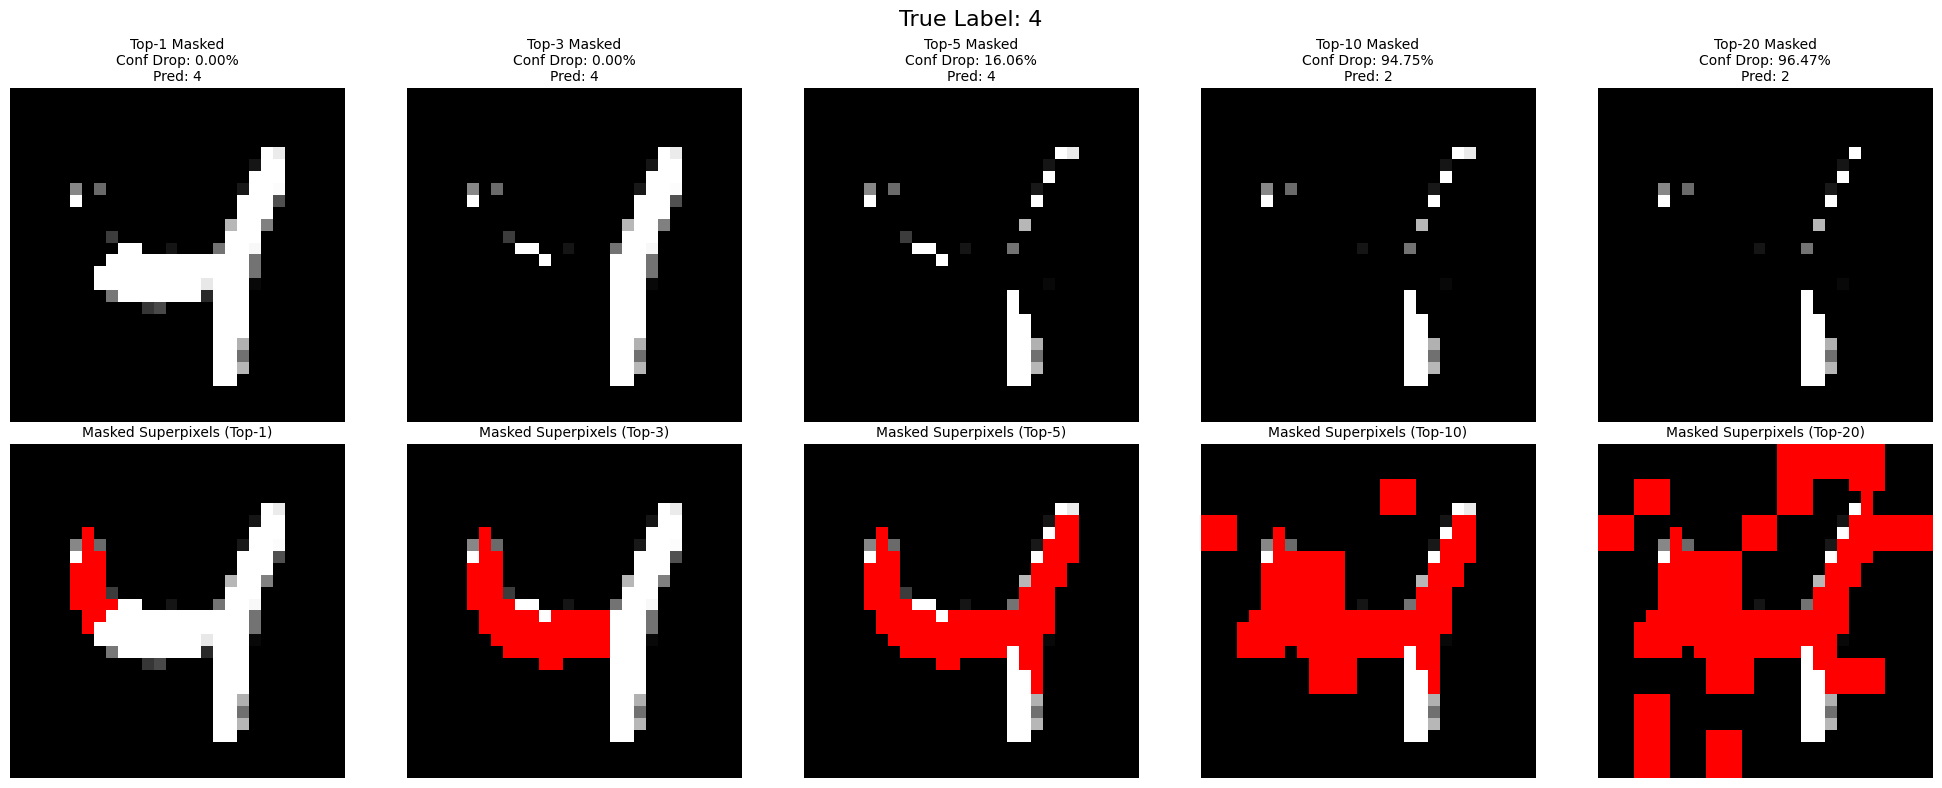

Sample 3 - True Label: 4


  0%|          | 0/1000 [00:00<?, ?it/s]

Original Confidence for Predicted Label 4: 1.00
Top Superpixel Importance Scores: [(33, 0.8553932710611328), (29, 0.0663445695199763), (26, 0.06468157703782104), (43, 0.040018473401661335), (30, 0.03846091429156036), (15, 0.02715221912729252), (27, 0.026376755590063725), (4, 0.02211109035703935), (52, 0.021338429632971587), (47, 0.019828755393482035)]

Top-1 Masked:
    Perturbed Confidence: 0.05
    Confidence Drop: 95.20%
    Predicted Label After Masking: 5



Top-3 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 99.99%
    Predicted Label After Masking: 7

Top-5 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 100.00%
    Predicted Label After Masking: 7

Top-10 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 100.00%
    Predicted Label After Masking: 7

Top-20 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 100.00%
    Predicted Label After Masking: 7


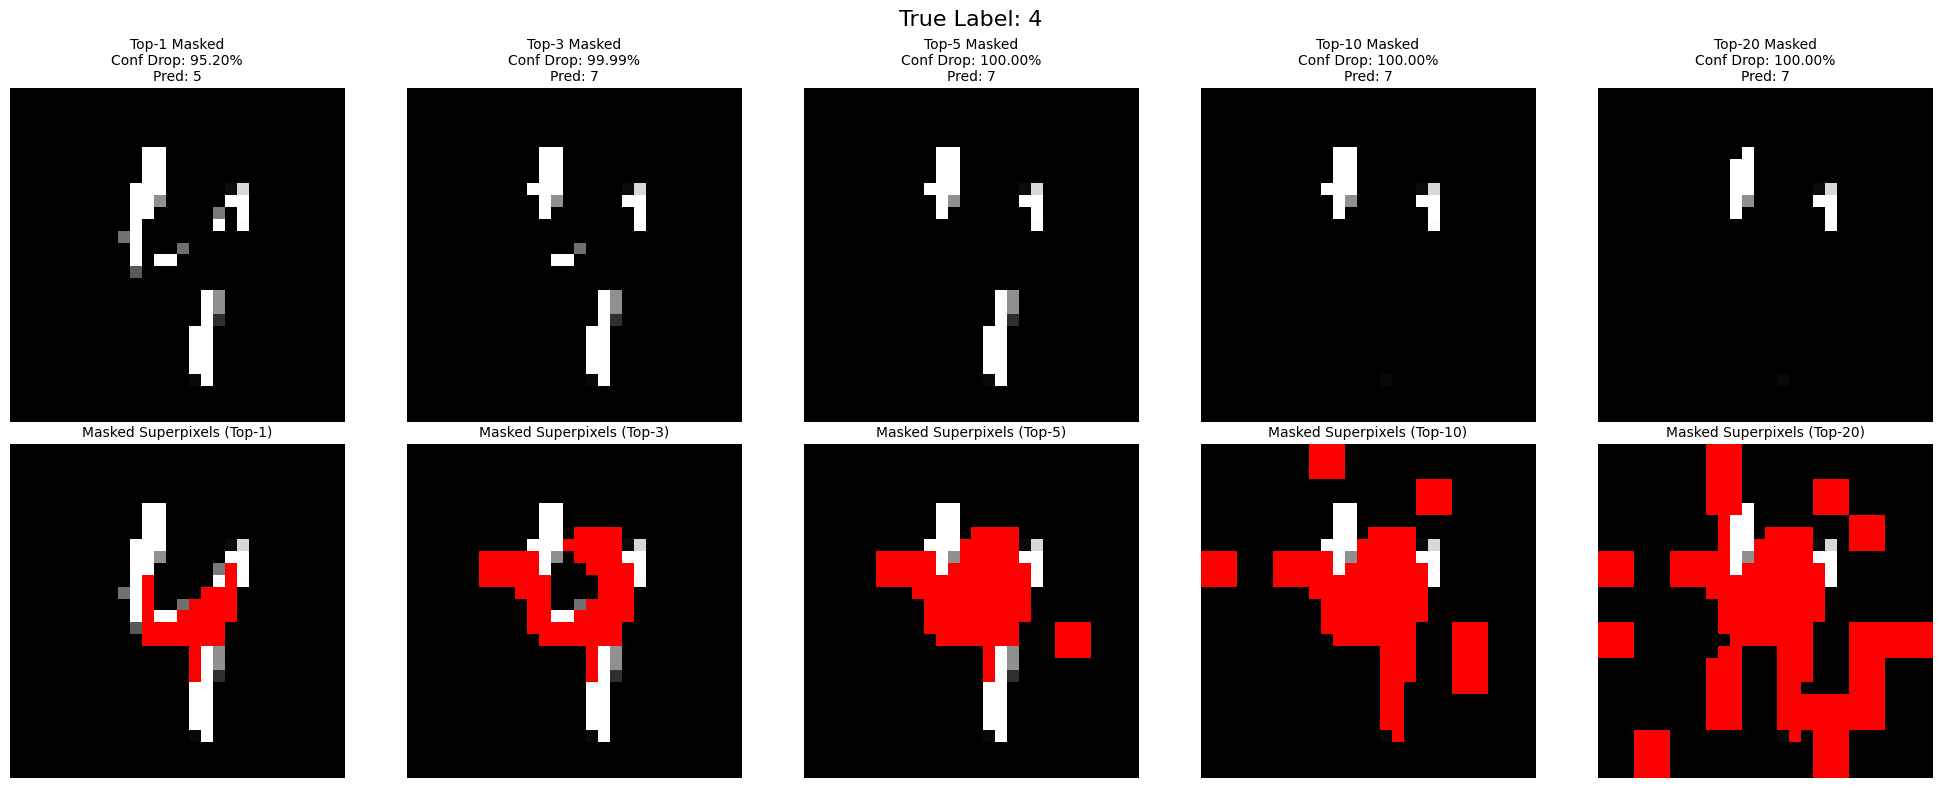

Sample 4 - True Label: 6


  0%|          | 0/1000 [00:00<?, ?it/s]

Original Confidence for Predicted Label 6: 1.00
Top Superpixel Importance Scores: [(42, 0.425528831088082), (46, 0.3624220498837005), (51, 0.2221764360898439), (39, 0.09681054628456136), (25, 0.06028281611580063), (59, 0.0493365344143055), (7, 0.04457207275282401), (52, 0.03860381033343274), (6, 0.035201571770863), (45, 0.02391040100231005)]

Top-1 Masked:
    Perturbed Confidence: 1.00
    Confidence Drop: 0.00%
    Predicted Label After Masking: 6



Top-3 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 100.00%
    Predicted Label After Masking: 5

Top-5 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 100.00%
    Predicted Label After Masking: 5

Top-10 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 100.00%
    Predicted Label After Masking: 5

Top-20 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 100.00%
    Predicted Label After Masking: 5


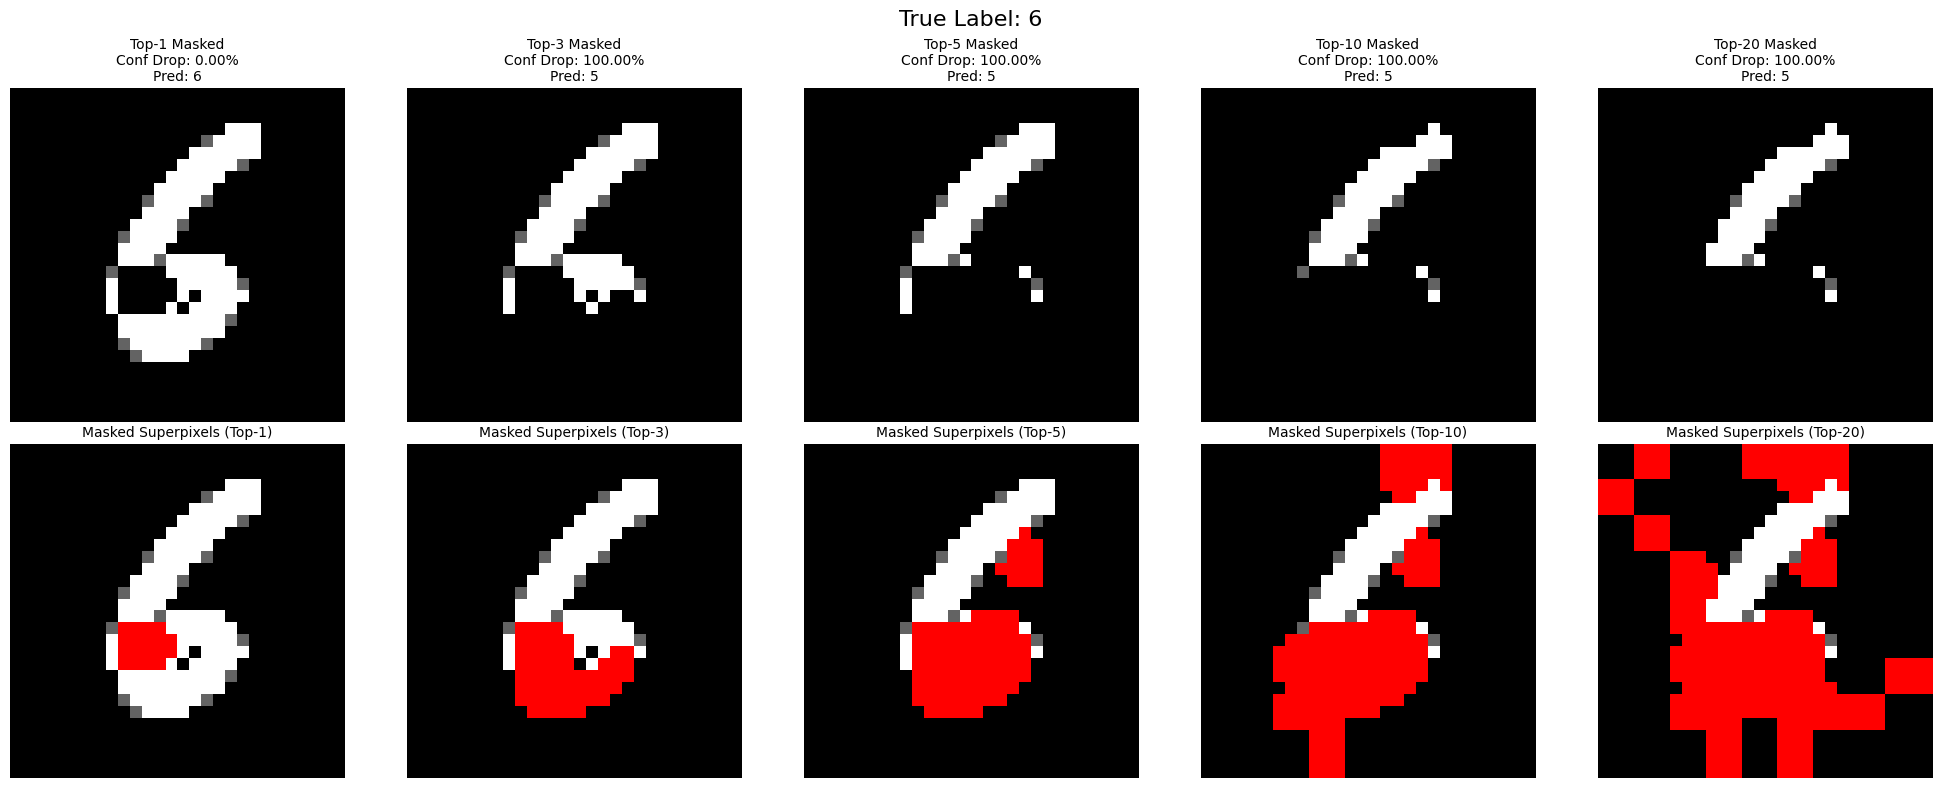

Sample 5 - True Label: 3


  0%|          | 0/1000 [00:00<?, ?it/s]

Original Confidence for Predicted Label 3: 1.00
Top Superpixel Importance Scores: [(17, 0.47096630261977523), (31, 0.39008249728812666), (54, 0.28803958287895975), (43, 0.08739025053091916), (25, 0.07622555794480233), (42, 0.05215000720521692), (3, 0.05046569275485409), (24, 0.046081644355237844), (58, 0.035635654496240204), (32, 0.03501139489526017)]



Top-1 Masked:
    Perturbed Confidence: 1.00
    Confidence Drop: 0.02%
    Predicted Label After Masking: 3

Top-3 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 99.72%
    Predicted Label After Masking: 4

Top-5 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 99.96%
    Predicted Label After Masking: 4

Top-10 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 99.99%
    Predicted Label After Masking: 2

Top-20 Masked:
    Perturbed Confidence: 0.00
    Confidence Drop: 99.99%
    Predicted Label After Masking: 4


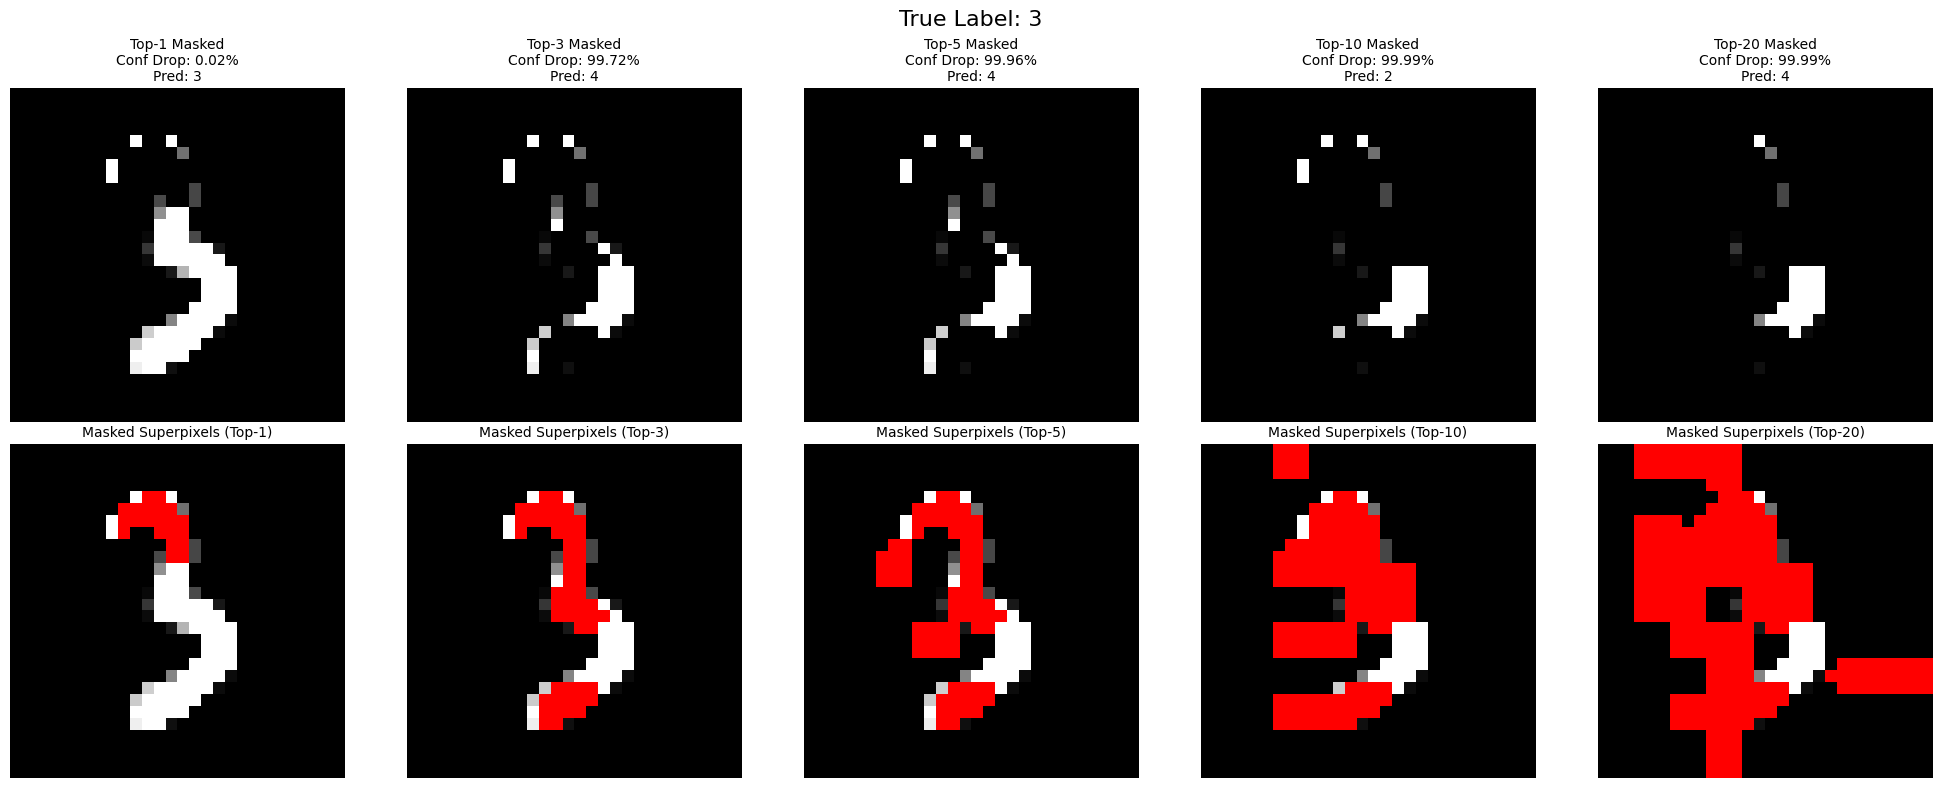

In [184]:
# Ensure reproducibility
torch.manual_seed(100)
np.random.seed(100)
random.seed(100)

# Define the number of samples and superpixel steps
num_samples = 5

# Select 5 random indices
random_indices = random.sample(range(images.size(0)), num_samples)

# Apply the function to each randomly chosen sample
for idx, random_index in enumerate(random_indices):
    # Get the sample image and label
    sample_image = images[random_index].squeeze(0).numpy()  # Convert to 2D array
    sample_label = labels[random_index].item()

    print(f"Sample {idx + 1} - True Label: {sample_label}")

    # Visualize the impact of masking superpixels
    predict_on_masked_superpixels(sample_image)
